<center style="font-size:2.5rem;font-weight:bold">Projet : Algorithmie et optimisation combinatoire :</center>
<center style="font-size:2rem;font-weight:bold">Déterminer une tournée de véhicule</center>

<br/><br/>

Groupe 2 :
- Hugo HELM
- Nicolas REAU
- Yasmine BOUZELRAOUI
- Alban GODIER

# Remise en contexte

ADEME (Agence de l’Environnement et de la Maîtrise de l’Énergie) a récemment lancé un appel à manifestation d’intérêt pour promouvoir la réalisation d'expérimentations de nouvelles solutions de mobilité pour les personnes et les marchandises adaptées à différents types de territoires.

Nous faisons partie de l’équipe mise en place, CesiCDP, pour répondre à l’appel de l’ADEME.

## Objectif

Le problème algorithmique consiste à calculer sur un réseau routier une tournée permettant de relier entre elles un sous-ensemble de villes, puis de revenir à son point de départ, de manière à minimiser la durée totale de la tournée.

# Définition du problème

## Contraintes 

1. Chaque objet a un point de collecte spécifique
    - Le camion doit passer par le point de collecte d'un objet avant de passer par son point de livraison.
2. Fenêtre de temps de livraison pour chaque objet
    - Interdiction de livrer hors de la fenêtre.
    - Possibilité d'attendre sur place l'ouverture de la fenêtre temporelle.

## Transformation initiale et représentation du problème sans contraintes

On considère l'ensemble des villes du problème des tournées de livraison : $G_i(V_i,E_i)$ avec $V_i$ les villes et $E_i$ les liaisons entre les villes, contenant le temps de trajet.
On peut décomposer $V_i$ en $V_i=V_{P}+V_{L}$ avec $V_{P}$ l'ensemble des villes de passage (dans lesquelles il n'y a pas de livraison) et $V_{L}$ l'ensemble des villes de livraison (dans lesquelles il y a un point de livraison ainsi que le point de départ).
On peut alors former un nouveau graphe $G(V_L, E)$, complet, où les arêtes $E$ sont égales à la somme des poids des arêtes séparant deux sommets de $V_L$ dans $G_i$ par le chemin le plus court.
Ainsi, on lie les points $A$ et $B$ du graphe $G$ tel que chaque arête a un poids égal à la somme des poids des arêtes entre $A_i$ et $B_i$ dans $G_i$, et ce, pour chaque chemin.

Formellement, cela donne : 

$$
G=(V_L, E, w: {V_L}^2\rightarrow \mathbb{R})\ \text{avec}\ w(A, B) = shortest(A_i, B_i) \quad \forall \ A,B\in {V_L}^2
$$
Avec :
- $shortest : {V_i}^2 \rightarrow \mathbb{R}$ : le poids du plus court chemin entre deux points ($A_i$ et $B_i$) dans le graphe $G_i$.

### Exemple

Le graphe $G_i$ suivant :

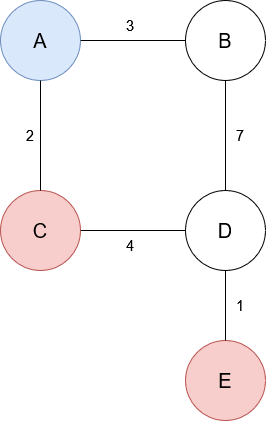

Dans lequel on a :

$V_L=\{A, C, E\}$

$V_P=\{B, D\}$

$A$ est le point de départ.


Deviens le graphe $G$ suivant :

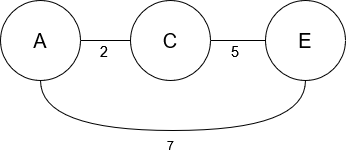

## Définition du problème sans contraintes

### Données

- Un graphe $G(V, E)$ dans lequel $V$ est l'ensemble des villes et $E$ l'ensemble des liaison entre les villes, arêtes-valuées (les valeurs de temps de trajets, décomposées en $l$, la distance d'une ville à une autre et $v$ la vitesse moyenne du véhicule sur le trajet ainsi,  $w(u, v)=\frac{l_{(u,v)}}{v_{(u,v)}}$)

### Questions

- **Optimisation**  : Quelle est la tournée la plus optimisée pour livrer tous les points et revenir au point de départ ?
- **Décision** : Existe-t-il une tournée passant par tous les points de livraisons dont la durée de parcours ne dépasse pas un entier $k$ positif ?

### Certificat

- Vérifier si tous les points de livraison sont présents au moins une fois dans la tournée du camion. ($\mathcal{O}(n)$)
- Vérifier que le premier point de la tournée est le même que le dernier. ($\mathcal{O}(1)$)

Le certificat a au maximum une complexité de $\mathcal{O}(n)$ il peut donc vérifier les solutions au problème dans un temps polynomial.
Le problème des tournées de livraison appartient donc à $NP$.

### NP-Complétude

Nous avons déjà montré que notre problème appartient à $NP$, grâce au certificat. Pour prouver qu'il est $NP$-Complet, il faut maintenant que nous prouvions qu'il est $NP$-Difficile.

Pour cela, nous allons effectuer une réduction polynomiale d'un problème appartenant à $NP$ vers notre problème.

Pour cela, nous avons choisi le problème du cycle hamiltonien. Ce problème est défini de la manière suivante :

- Un graphe $G_H(V_H, E_H)$ incomplet et non pondéré utilisé dans le problème du cycle hamiltonien. Avec $V_H$ l'ensemble des sommets et $E_H$ l'ensemble des arêtes.

L'objectif du cycle hamiltonien est de passer par tous les sommets du graphe une et une seule fois, et de revenir à son point de départ.

Le but de cette réduction polynomiale est ainsi de passer d'une instance du cycle hamiltonien à une instance de notre problème, de manière à avoir une coïncidence des réponses.

#### Idées de réduction

Considérons un algorithme qui prend en entrée une instance $I_H$ du problème du cycle hamiltonien, constituée du graphe $G_H(V_H, E_H)$, et qui retourne une instance $I$ de notre problème constituée :

- du graphe $G$ obtenu en complétant le graphe $G_H$ et en pondérant toutes les arêtes de $E$ appartenant aussi à $E_H$ à 1 et toutes les arêtes $E$ n'appartenant pas à $E_H$ à 2.
- de l'entier $k$, égal au nombre de sommets dans le graphe. Cet entier est fixé pour limiter la solution aux arêtes pondérées à 1.

Exemple :

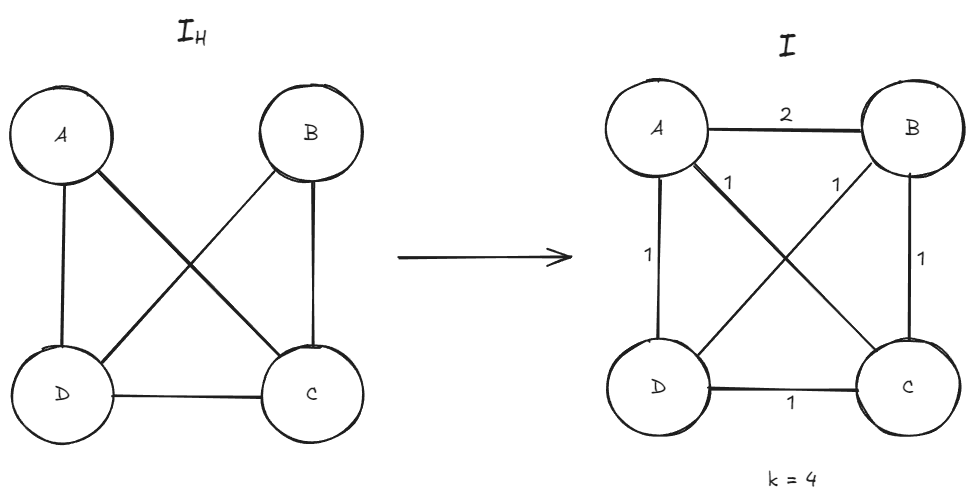

Ici, $\{A, D, B, C, A\}$ est une solution au problème du cycle hamiltonien : elle passe par tous les points une seule fois et revient au point de départ. Elle est aussi une solution à notre problème : elle passe par tous les points en revenant à notre point de départ, et la somme des poids est égale à 4 et respecte donc $k \ge 4$ 

À l'inverse $\{A, B, C, D, A\}$ n'est pas solution du cycle hamiltonien, puisqu'elle passe par l'arête $\{A, B\}$ qui n'est pas dans $E_H$. Elle n'est également pas solution de notre problème puisque la somme des poids est égale à $5$ et l'inégalité $k \ge 5$ est fausse.

#### Réduction

Afin de formaliser et de valider notre réduction polynomiale, nous allons la poser mathématiquement :

Nous passons d'une instance $I_H$, avec un graphe $G_H(V_H, E_H)$, à une instance $I$, avec un graphe $G(V, E)$, en utilisant la relation suivante :

$$G = (V_H, E_H + \overline{E_H}, w : E_H + \overline{E_H} \rightarrow \mathbb{N})\ \text{avec}\ w(u)=1 \ \forall\ u \in E_H\ \text{et}\ w(u)=2\ \forall\ u \in \overline{E_H} $$
$$k = number(V_H)$$

Avec :
- $number : G \rightarrow \mathbb{N}$ le nombre de sommets d'un graphe $G$.

#### Algorithme

L'algorithme pour passer d'une instance à l'autre suit les étapes suivantes :

- Compléter le graphe. ($\mathcal{O}(n)$ dans le cas où on utiliserait une matrice d'adjacence)
- Pondérer conditionnellement le graphe ($\mathcal{O}(n)$)

L'algorithme de transformation s'exécute bien en temps polynomial, ici $\mathcal{O}(n)$, il est donc valide pour la réduction.

#### Vérification

Afin de vérifier la validité de notre réduction, nous allons vérifier la coïncidence des réponses pour les deux instances.

**Cas valide :**

- S'il existe une tournée de livraison partant de $A$ dans le graphe $G(V, E)$ dont le poids total est inférieur ou égal à $k$, il existe un cycle hamiltonien dans $G_H(V_H, E_H)$.
- En considérant qu'il existe une tournée avec comme point de départ $A$ dans le graphe $G$ et dont le poids total est inférieur ou égal à $k$ : $S = (A, V_1, ..., V_{n-1}, A)$ tel que $poids(S) \le k$
- Les arêtes n'existant pas dans $G_H$ sont pondérés à 2 dans $G$.

Une solution passant par des arêtes existantes dans $G_H$ aura forcément un poids total inférieur ou égal à $k$ (puisque toutes les arêtes existantes sont pondérées à 1 et que nous fixons $k$ en fonction du nombre de sommets).
Cette solution passe forcément une seule fois par chaque sommet, puisqu'un aller-retour augmenterait le poids total au-dessus de $k$. Ainsi, une solution à notre problème est toujours une solution valide du cycle hamiltonien.

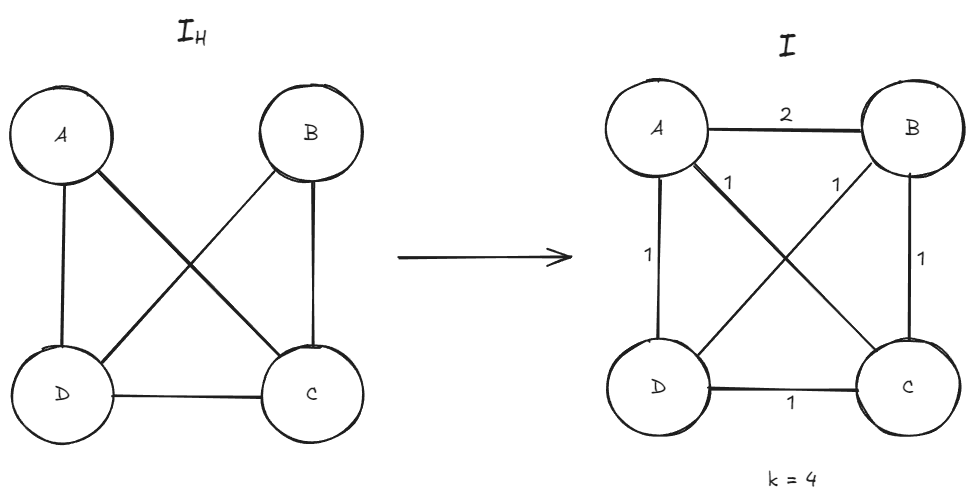

**Cas invalide :**

- S'il n'existe pas de tournée de livraison partant de $A$ dans le graphe $G(V, E)$ dont le poids total est inférieur ou égal à $k$, il n'existe pas de cycle hamiltonien dans $G_H(V_H, E_H)$.
- En considérant qu'il n'existe pas de tournée avec comme point de départ $A$ dans le graphe $G$ dont le poids total est inférieur ou égal à $k$, il ne peut pas exister de cycle hamiltonien dans $G_H$

Une solution dans $G$ dont le poids total excède $k$ soit passerait par une arête n'existant pas dans $G_H$ soit reviendrait sur un sommet sur lequel il est déjà passé, ce qui n'est pas possible dans le cycle hamiltonien. Ainsi, si une solution est invalide pour notre problème, elle est forcément invalide pour le cycle hamiltonien.

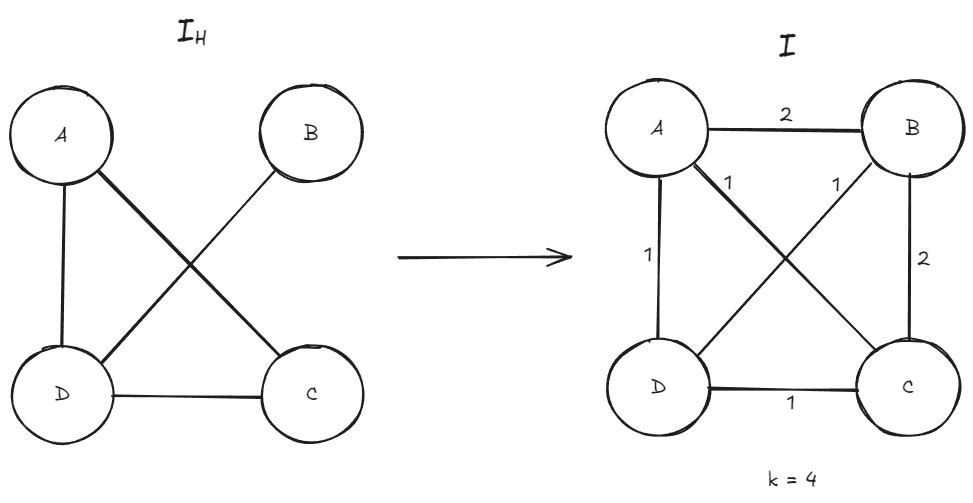

#### Conclusion

S'il existe un algorithme capable de résoudre polynomialement le cycle hamiltonien, on pourrait résoudre polynomialement notre problème avec cet algorithme. $\text{cycle hamiltonien} \leqslant  \text{notre problème}$, notre problème est donc NP-Difficile.

Comme notre problème est dans NP et qu'il est NP-Difficile, il est NP-Complet. Cela implique qu'il n'existe probablement pas d'algorithme pour le résoudre en un temps inférieur à un temps polynomial.
Ainsi, lorsque nous concevrons notre algorithme, il faudra le prendre en compte et utiliser des méthodes d'approximation pour trouver le résultat plus vite.

## Définition du problème avec contrainte de dépendance 

En prenant en compte la contrainte des points de collecte, le problème change et il inclut maintenant de l'obligation de passer par les points de collectes des objets avant de passer par les points de livraisons liés.

### Données

- $L_O$ La liste des objets à livrer.
- $V_L$ L'ensemble des villes dans lesquelles il faut livrer. $V_L \in V$ 
- $V_C$ L'ensemble des villes dans lesquelles collecter un objet. $V_C \in V$
- $o : V \rightarrow O\ ,\ O \in L_O$ : $o$ est une fonction donnant l'objet associé à un point donné qu'il soit un point de collecte ou un point de livraison. Par exemple, si au point $A$, on peut récupérer un objet $O_1$, alors $o(A) = O_1$ de même si on peut déposer l'objet $O_2$ au point de livraison $B$, alors $o(B) = O_2$.

On définit l'association d'un objet avec son point de collecte et son point de livraison par la formule suivante sachant qu'un point de collecte n'est associé qu'à un et un seul objet et qu'un point de livraison n'est également associé qu'à un et un seul objet : 
$$ \forall O \in L_O ,\quad \exists! \ \  V_{L,O} \in V_L \ \text{et} \ V_{C,O} \in V_C $$

### Questions

- **Optimisation** : Quelle est la tournée la plus optimisée pour livrer tous les points et revenir au point de départ en récupérant les objets avant de les livrer ?
- **Décision** : Existe-t-il une tournée passant par tous les points de livraisons dont la durée de parcours ne dépasse pas un entier $k$ positif et dont chaque point de livraison figure après le point de collecte correspondant dans le parcours ?

### Modélisation de la contrainte

Soit une solution à notre problème $S$, définit par une liste de sommets ordonnée définissant l'ordre de la tournée.

On définit la contrainte, pour une solution $S$, par le passage par un point de collecte avant le point de livraison associé, de la manière suivante :
 
$$\forall V_{S} \in S \cap V_L,\quad \exists! \ V_{before} \in before(V_{S}) \cap V_C \ | \ o(V_{before}) = o(V_{S})$$

Avec : 
- $before : V \rightarrow \{V_{before} \in  V \cap S \}$ une fonction qui pour un sommet de notre graphe $v \in V$ dans notre solution $S$, renvoie l'ensemble des sommets $V_{before}$ dans $V$ du graphe ayant été visités avant dans la solution. C'est-à-dire l'ensemble des villes visités avant ce point.

### Exemple

Pour l'instance suivante de notre problème :

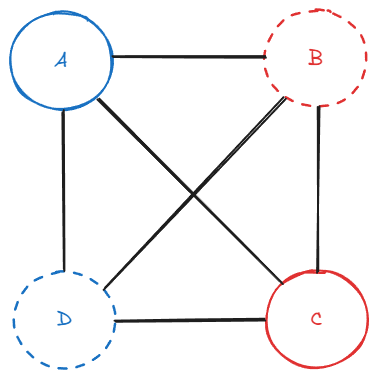

On a :

- $V_L = \{B, D\}$
- $V_C = \{ A, C\}$
- $o(A) = o(D)$ et $o(B) = o(C)$

Pour qu'une solution ${S}$ au problème soit admise, elle doit respecter les contraintes suivantes :

- $A_S \in before(D_{S})$
- $C_S \in before(B_{S})$

Ainsi, les solutions possibles sont : 
- $\{A, D, C, B, A\}$ : Dans ce cas, on a : 
    - $before(D) = \{A\}$ : on respecte donc bien $A \in before(D)$
    - $before(B) = \{A, D, C\}$ : on respecte donc bien $C \in before(B)$
- $\{A, C, D, B, A\}$ : Dans ce cas, on passe par tous les points de collecte avant de passer par les points de livraison, on a alors :
    - $before(D) = \{A, C\}$ : on respecte donc bien $A \in before(D)$
    - $before(B) = \{A, C, D\}$ : on respecte donc bien $C \in before(B)$
- $\{A, C, B, D, A\}$ : Dans ce cas, on passe par tous les points de collecte avant de passer par les points de livraison, on a alors :
    - $before(D) = \{A, C, B\}$ : on respecte donc bien $A \in before(D)$
    - $before(B) = \{A, C\}$ : on respecte donc bien $C \in before(B)$

## Définition du problème avec contrainte temporelle

Cette contrainte considère que chaque ville doit être livrée dans un intervalle de temps spécifique. 
Lors de sa tournée, le camion peut attendre l'ouverture du point de livraison. 

### Données

Les fenêtres de temps sont représentées par deux valeurs : un début et une fin. Chacune de ces valeurs est associée à une ville.

- $start : V_L \rightarrow \mathbb{R}$ : fonction permettant d'obtenir le début de la fenêtre de temps.
- $end : V_L \rightarrow \mathbb{R}$ : fonction permettant d'obtenir la fin de la fenêtre de temps.

Ainsi : 
$$
\forall A \in V_L, \ \ \exists! \ \  start(A) \in \mathbb{R} \ \ \text{et} \ \ end(A) \in \mathbb{R} 
$$

### Questions

- **Optimisation** : Quelle est la tournée la plus optimisée pour livrer tous les points et revenir au point de départ en respectant les fenêtres de livraison ?
- **Décision** : Existe-t-il une tournée passant par tous les points de livraisons dont la durée de parcours ne dépasse pas un entier $k$ positif et dont l'heure de passage de chaque ville est dans la fenêtre de livraison qui lui est associée ?

### Modélisation de la contrainte

Soit une solution à notre problème ${S}$, définit par une liste de sommets ordonnée définissant l'ordre de la tournée.

On définit la contrainte, pour une solution ${S}$, par le passage dans chaque ville pendant sa fenêtre temporelle, de la manière suivante : 

$$
\forall A \in {S}, \ \ duration(before(A) \cup \{A\}) \in [start(A), end(A)]
$$

<!--
- $before : V \rightarrow \{V_{before} \in V \cap S_T \}$ une fonction qui pour un sommet de notre graphe $v \in V$ dans notre solution ${S_T}$, renvoie l'ensemble des sommets $V_{before}$ dans $V$ du graphe ayant été visités avant dans la solution. C'est à dire l'ensemble des villes visités avant ce point. 
- $wait : 
    \begin{cases}
        \begin{array}{rcl} 
          \mathcal{P}(V) & \rightarrow & \mathbb{R} \\
          S = \{A_i, \forall i \in [1, |S|]\} & \mapsto & 
              \begin{cases}
                  \begin{array}{rl} 
                  start(A) - \overset{|S| - 1}{\underset{i = 1}{\sum}} \bigg( w(\{A_i, A_{i+1}\}) + wait(\{A_j, j \in [1, i]\}, A_i) \bigg) & \text{si} \ start(A) > \overset{|S| - 1}{\underset{i = 1}{\sum}} \bigg( w(\{A_i, A_{i+1}\}) + wait(\{A_j, j \in [1, i]\}, A_i) \bigg) \\
                  0 & \text{sinon}
                  \end{array} 
              \end{cases}
          \end{array} 
    \end{cases}
  $ :

  fonction retournant le temps que le camion doit attendre pour déposer son objet et donc repartir.
- $duration : 
    \begin{cases}
        \begin{array}{rcl} 
            \mathcal{P}(V) & \rightarrow & \mathbb{R} \\ 
            S = \{A_i, \forall i \in [1, |S|]\} & \mapsto & \overset{|S| - 1}{\underset{i = 1}{\sum}} \bigg( w(\{A_i, A_{i+1}\}) + wait(\{A_j, j \in [1, i]\}, A_i) \bigg) + wait(S, A_{|S|})
        \end{array} 
    \end{cases}
  $ :

  fonction donnant la durée de parcours d'un chemin fourni, par exemple de la solution. Cette durée est calculée à partir de la somme des poids des arêtes à laquelle on ajoute la durée d'attente nécessaire pour déposer l'objet et donc repartir.
-->

- $before : V_L \rightarrow \{V_{before} \in V_L \cap S \}$ une fonction qui, pour un sommet de notre graphe $v \in V_L$, dans notre solution ${S}$, renvoie l'ensemble des sommets $V_{before}$ dans $V_L$ du graphe ayant été visités avant dans la solution. C'est-à-dire l'ensemble des villes visitées avant ce point. 
- $duration : \mathcal{P}(V_L) \rightarrow \mathbb{R}$ : fonction donnant la durée de parcours d'un chemin fourni, par exemple de la solution. Cette durée est calculée à partir de la somme des poids des arêtes à laquelle on ajoute la durée d'attente nécessaire pour déposer l'objet et donc repartir. Cette fonction prend également en compte le début de la fenêtre de temps du dernier point, car le camion ne sera disponible qu'après avoir attendu et déposé son objet.

Lors de nos différentes modélisations du problème sous forme d'exemple, nous avons défini la fenêtre de temps du point de départ tel que $start(Départ) = 0$ et $end(Départ) = \infty$ car on considère un problème d'optimisation.
<!--
Cependant, on peut tout à fait imaginer que le camion parte du point de départ à une heure donnée et doivent faire sa tournée en un temps maximal donné. Par exemple : $start(Départ) = 3$ et $end(Départ) = 42$.
-->

### Exemple

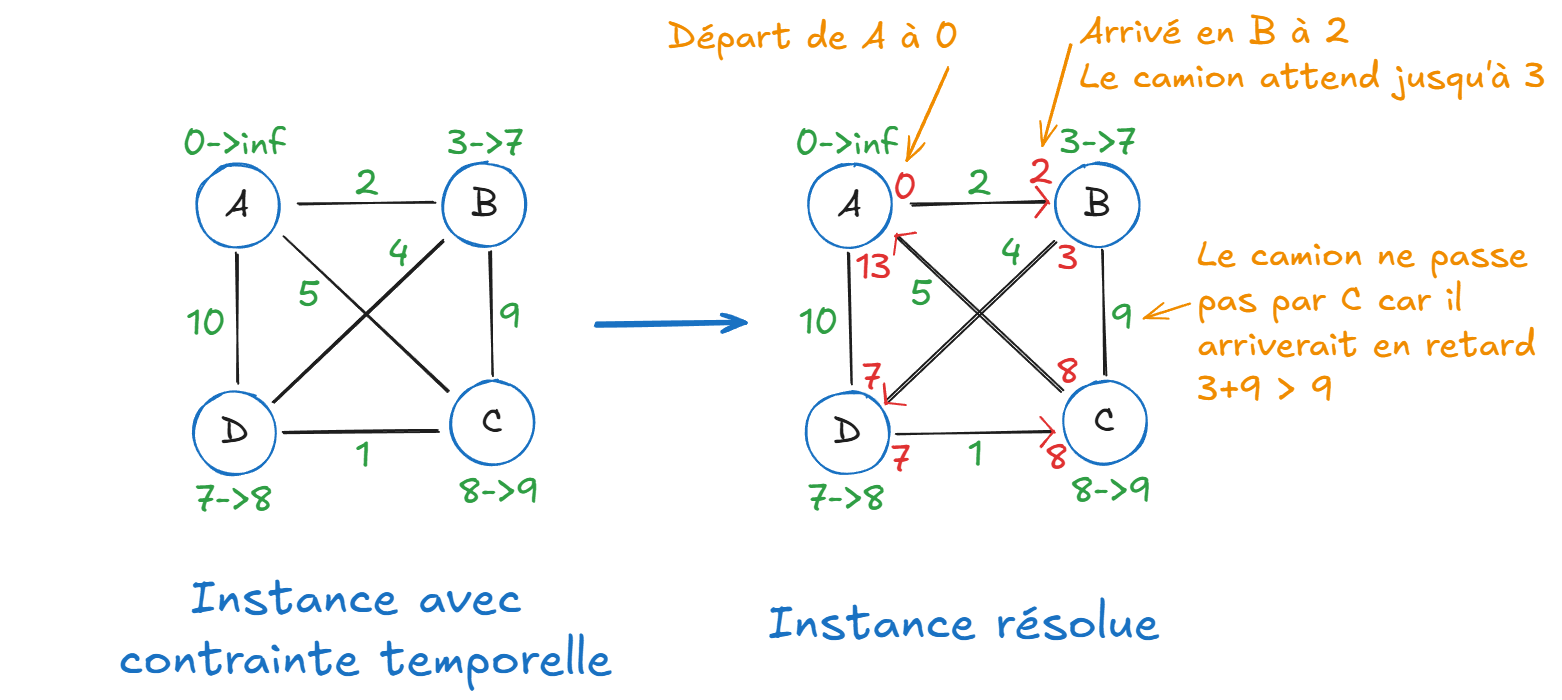

On a par exemple : 
- $V_T = \{A,B,C,D\}$
- $start(A) = 0$
- $end(B) = 7$
- $w(\{B,C\}) = 9$

Pour qu'une solution $S$ au problème soit admise, elle doit respecter les contraintes suivantes :
- $duration(before(B) \cup \{B\}) \in [3, 7]$ : Le temps nécessaire pour arriver au point B dans la solution doit être compris dans l'intervalle correpondant à sa fenêtre de temps.
- $duration(before(C) \cup \{C\}) \in [8, 9]$ : Le temps nécessaire pour arriver au point C dans la solution doit être compris dans l'intervalle correpondant à sa fenêtre de temps.
- $duration(before(D) \cup \{D\}) \in [7, 8]$ : Le temps nécessaire pour arriver au point D dans la solution doit être compris dans l'intervalle correpondant à sa fenêtre de temps.
- $duration(before(A) \cup \{A\}) \in [0, \infty]$ : Le temps nécessaire pour arriver au point A dans la solution doit être compris dans l'intervalle correpondant à sa fenêtre de temps. On parle ici du point A en tant que point d'arrivée et non point de départ.

Ainsi, la seule solution est : 
- $\{A,B,D,C,A\}$ : Dans ce cas, on a :
   - $before(B) = \{A\}$ et donc $duration({A} \cup \{B\} = \{A, B\}) = 2 + (0 - 0) + (3 - 2) = 3$ où :
       - $2$ est le poids de l'arête $\{A, B\}$
       - $0 - 0$ est le début de la fenêtre de temps de $A$ ($start(A)$) moins le temps nécessaire pour l'atteindre.
       - $3 - 2$ est le début de la fenêtre de temps de $B$ ($start(B)$) moins le temps nécessaire pour l'atteindre ($2 + (0 - 0)$) si la différence est positive.
   - $before(D) = \{A, B\}$ et donc $duration({A, B} \cup \{D\} = \{A, B, D\}) = 2 + (0 - 0) + (3 - 2) + 4 + (7 - 7) = 7$.
   - $before(C) = \{A, B, D\}$ et donc $duration({A, B, D} \cup \{C\} = \{A, B, D, C\}) = 2 + (0 - 0) + (3 - 2) + 4 + (7 - 7) + 1 + (8 - 8) = 8$.
   - $before(A) = \{A, B, D, C\}$ et donc $duration({A, B, D, C} \cup \{A\} = \{A, B, D, C, A\}) = 2 + (0 - 0) + (3 - 2) + 4 + (7 - 7) + 1 + (8 - 8) + 5 = 13$. Pour ce dernier point, on n'ajoute pas $(0 - 13)$ à la fin du calcul, car la différence est négative.
  
  Dans chacun de ces cas, la contrainte est respectée, par exemple : $duration(before(C)) = 8 \in [8, 9]$.

# Implémentation

In [82]:
import pulp
import math
import random
import typing
import numpy as np
import networkx as nx
from copy import deepcopy
from tabulate import tabulate
from collections import deque
from matplotlib import pyplot as plt, lines

## Choix de l'algorithme

Notre problème étant $NP$-Complet, une résolution en un temps polynomial n'est actuellement pas possible. Pour obtenir une solution optimale dans un temps raisonnable, on utilise la recherche opérationnelle et en particulier une méta-heuristique.

> Les méta-heuristiques sont des algorithmes génériques conçus pour résoudre des problèmes d'optimisation difficiles, souvent de manière approximative. Elles ne garantissent pas une solution optimale, mais permettent de trouver une solution "convenable" en un temps raisonnable.

Parmi les différentes méta-heuristiques existantes, il y a deux approches principales :
- les méthodes par trajectoire : elles suivent un chemin unique dans l'espace de recherche. L'idée est de construire une solution progressivement ou en exploitant la solution précédemment trouvée. Ces méthodes mettent l'accent sur la phase d'intensification, insistant sur la recherche de la meilleure solution dans une partie de l'espace de recherche, ce qui a l'inconvénient de considérer des optima locaux comme solution. 
- les méthodes par population : elles manipulent plusieurs solutions simultanément. Cela permet d'explorer l'espace de recherche de façon plus diversifiée. Ces méthodes mettent l'accent sur la phase de diversification, insistant sur la recherche de solutions autres que celles déjà trouvées pour éviter les optima locaux.

Au vu de la taille des instances que nous souhaitons générer, il serait préférable d'utiliser une méthode par population afin d'éviter davantage les maximums locaux. Ce choix ne nous empêche pas d'avoir une phase d'intensification dans notre algorithme.

**Liste des algorithmes possibles** :

Parmi toutes les méta-heuristiques, voici quelques algorithmes relativement connus : 
- **Colonie de fourmis**: inspiré du comportement des fourmis qui déposent des phéromones pour guider leurs congénères vers des chemins prometteurs, cet algorithme utilise cette méthode pour explorer et exploiter les meilleures solutions en les marquant. Cet algorithme est particulièrement adapté aux problèmes de parcours et suit l'approche par population.
- **Algorithme génétique** : inspiré de la sélection naturelle privilégiant les croisements les plus profitables à un individu, cet algorithme utilise des croisements et des mutations d'une solution pour en générer une autre et sélectionner la meilleure avant de recommencer. Cet algorithme est particulièrement adapté aux espaces de recherche vastes et complexes, il suit également l'approche par population.
- **Recuit simulé** : inspiré du processus de refroidissement des matériaux en physique. Cet algorithme associe à chaque solution une température : plus celle-ci est basse, plus la solution est proche d'un optimum global. Cet algorithme peut être adapté par trajectoire ou par population.
- **Algorithme tabou** : utilise une mémoire pour sauvegarder les solutions déjà explorées et ainsi favoriser une exploration plus large de l'espace de recherche. Cet algorithme suit l'approche par trajectoire.

Nous avons décidé d'utiliser l'algorithme de la colonie de fourmis, car celui-ci est particulièrement adapté à la recherche de parcours avec une approche par population.

## Génération d'instances

La génération d'une instance se déroule en deux étapes :
- La génération d'une carte sous forme de graphe avec des villes et les routes les reliant. Ce graphe est incomplet, non orienté et pondéré.
- La réduction de cette carte avec la transformation initiale. On obtient donc un graphe complet, non orienté et pondéré.

Afin d'accélérer le processus, nous créerons aussi des fonctions générant des instances réduites directement.

### Description des fonctions

#### `generate_default_instance`

Génère une instance non réduite (avant transformation initiale). Cette fonction ne prend pas en compte les contraintes.

```python
def generate_default_instance(nb_nodes: int, nb_deliveries: int, min_weight: float = 1, 
                     max_weight: float = 10, density: float = 0.5) -> tuple[dict[int, dict[int, float]], list[int]]:
    pass
```

**Paramètres** : 
- `nb_nodes` (`int`) : Nombre de villes à générer.
- `nb_deliveries` (`int`) : Nombre de villes de livraison parmi les villes générées.
- `min_weight` (`float`) : Durée minimum de parcours d'une route entre deux villes.
- `max_weight` (`float`) : Durée maximum de parcours d'une route entre deux villes.
- `density` (`float` [0, 1]) : Densité des arêtes générées. Une valeur de $1$ signifie que le graphe généré sera complet. Dans tous les cas, le graphe est connexe. 

**Retour** : 

La fonction retourne deux éléments : 
- la liste des routes sous la forme `dict[première_ville, dict[deuxième_ville, durée_de_parcours]]`.
- la liste des points de livraison sous la forme `list[point_de_livraison]`.

**Exemple** : 

Pour 4 villes :
```python
instance, deliveries = generate_default_instance(4, int(4/2), 1, 10)
```

instance : 
```js
{
    0: { 1: 5.6, 3: 9.1 },
    1: { 0: 1.8, 2: 9.3, 3: 6.1 },
    2: { 0: 4.8, 3: 4.1 },
    3: { 2: 3.3 },
}
```

deliveries : 
```js
[1, 3]
```

#### `shortest_path`

Donne le plus court chemin entre deux points dans une instance grâce à l'algorithme de Dijkstra.

```python
def shortest_path(start: int, end: int, G: dict[int, dict[int, float]]) -> tuple[list[int], float]:
    pass
```

**Paramètres** : 
- `start` (`int`) : Ville de départ.
- `end` (`int`) : Ville d'arrivée.
- `G` (`dict[int, dict[int, float]]`) : Instance dans laquelle on cherche le chemin le plus court.

**Retour** : 

- Une liste des villes à emprunter.
- Le durée de parcours du chemin. 

**Exemple** : 

Pour 4 villes :
```python
G = {
    0: { 1: 10, 2: 2 },
    1: { 0: 10, 2: 1 },
    2: { 0: 2, 1: 1 },
}
path, weight = shortest_path(0, 1, G)
```
> ```
([0, 2, 1], 3)
```

#### `reduce_instance`

Réduit l'instance fournie (selon la transformation initiale). 

```python
def reduce_instance(instance: dict[int, dict[int, float]]) -> dict[int, dict[int, float]:
    pass
```

**Paramètres** : 
- `instance`: (`dict[int, dict[int, float]]`) : Instance à réduire.

**Retour** : 

Liste des routes sous la forme `dict[première_ville, dict[deuxième_ville, durée_de_parcours]]`. 

Le graphe retourné est complet.

**Exemple** : 

Pour 4 villes :
```python
instance = {
    0: { 1: 5.6, 3: 9.1 },
    1: { 0: 1.8, 2: 9.3, 3: 6.1 },
    2: { 0: 4.8, 1: 7.3 },
    3: { 1: 6.6 },
}
reduced_instance = reduce_instance(instance)
```

reduced_instance : 
```js
{
    0: { 1: 5.6, 2: 14.9, 3: 9.1},
    1: { 0: 5.6, 2: 9.3, 3: 6.1 },
    2: { 0: 14.9, 1: 9.3, 3: 13.4 },
    3: { 0: 9.1, 1: 6.1, 2: 13.4 }
}
```

#### `generate_reduced_default_instance`

Génère une instance réduite (après transformation initiale). Cette fonction ne prend pas en compte les contraintes.

```python
def generate_reduced_default_instance(nb_nodes: int, min_weight: float, max_weight: float) -> dict[int, dict[int, float]:
    pass
```

**Paramètres** : 
- `nb_nodes` (`int`) : Nombre de villes à générer.
- `min_weight` (`float`) : Durée minimum de parcours d'une route entre deux villes.
- `max_weight` (`float`) : Durée maximum de parcours d'une route entre deux villes.

**Retour** : 

La fonction retourne un élément : la liste des routes sous la forme `dict[première_ville, dict[deuxième_ville, durée_de_parcours]]`.

**Exemple** : 

Pour 4 villes :
```python
instance = generated_reduced_default_instance(4, 1, 10)
```

instance : 
```js
{
    0: { 1: 5.6, 2: 8.3, 3: 9.1 },
    1: { 0: 1.8, 2: 9.3, 3: 6.1 },
    2: { 0: 4.8, 1: 7.3, 3: 4.1 },
    3: { 0: 0.1, 1: 6.6, 2: 3.3 },
}
```

#### `generate_reduced_pickup_instance`

Génère une instance réduite (après transformation initiale). Cette instance contient les points de collectes et les points de livraisons. Cette fonction ne prend pas en compte la contrainte temporelle.

```python
def generate_reduced_pickup_instance(nb_nodes: int, min_weight: float, max_weight: float) -> tuple[dict[int, dict[int, float]], dict[int, int]]:
    pass
```

**Paramètres** : 
- `nb_nodes` (`int`) : Nombre de villes à générer.
- `min_weight` (`float`) : Durée minimum de parcours d'une route entre deux villes.
- `max_weight` (`float`) : Durée maximum de parcours d'une route entre deux villes.

**Retour** : 

La fonction retourne deux éléments : 
- la liste des routes sous la forme `dict[première_ville, dict[deuxième_ville, durée_de_parcours]]`.
- la liste des points de collecte et points de livraison sous la forme `dict[point_de_collecte, point_de_livraison]`.

**Exemple** : 

Pour 4 villes :
```python
instance, delivery_pickup = generated_reduced_pickup_instance(4, 1, 10)
```

instance : 
```js
{
    0: { 1: 5.6, 2: 8.3, 3: 9.1 },
    1: { 0: 1.8, 2: 9.3, 3: 6.1 },
    2: { 0: 4.8, 1: 7.3, 3: 4.1 },
    3: { 0: 0.1, 1: 6.6, 2: 3.3 },
}
```

delivery_pickup : 
```js
{
    0: 1,
    2: 3
}
```

#### `generate_reduced_time_instance`

Génère une instance réduite (après transformation initiale). Cette instance contient les fenêtres de livraison pour l'ensemble des points de livraison. Cette fonction ne prend pas en compte la contrainte de dépendance.

```python
def generate_reduced_time_instance(nb_nodes: int, min_weight: float, max_weight: float, max_time: float) -> tuple[dict[int, dict[int, float], dict[int, tuple[float, float]]:
    pass
```

**Paramètres** : 
- `nb_nodes` (`int`) : Nombre de villes à générer.
- `min_weight` (`float`) : Durée minimum de parcours d'une route entre deux villes.
- `max_weight` (`float`) : Durée maximum de parcours d'une route entre deux villes.
- `max_time` (`float`) : Délai maximum de passage. 

**Retour** : 

- L'instance générée : `tuple[dict[int, dict[int, float]]`.
- L'association des villes avec leur fenêtre de temps : `dict[int, tuple[float, float]]`.

**Exemple** : 

Pour 4 villes :
```python
instance, time_windows = generated_reduced_time_instance(4, 1, 10, 10)
```

instance : 
```python
{
    0: { 1: 5.6, 2: 8.3, 3: 9.1 },
    1: { 0: 1.8, 2: 9.3, 3: 6.1 },
    2: { 0: 4.8, 1: 7.3, 3: 4.1 },
    3: { 0: 0.1, 1: 6.6, 2: 3.3 },
}
```
time_windows : 
```python
{
    0: (1.5, 3.9),
    1: (5.9, 9.1),
    2: (8.7, 4.7),
    3: (3.4, 5.6)
}
```


#### `generate_reduced_complete_instance`

Génère une instance réduite (après transformation initiale). Cette instance contient les fenêtres de livraison pour l'ensemble des points de livraison et les points de collecte.

```python
def generate_reduced_complete_instance(nb_nodes: int, min_weight: float, max_weight: float, max_time: float) -> tuple[dict[int, dict[int, float], dict[int, int], dict[int, tuple[float, float]]:
    pass
```

**Paramètres** : 
- `nb_nodes` (`int`) : Nombre de villes à générer.
- `min_weight` (`float`) : Durée minimum de parcours d'une route entre deux villes.
- `max_weight` (`float`) : Durée maximum de parcours d'une route entre deux villes.
- `max_time` (`float`) : Délai maximum de passage. 

**Retour** : 

- L'instance générée : `tuple[dict[int, dict[int, float]]`.
- L'association des villes de livraison avec leur unique point de collecte : `dict[int, int]`.
- L'association des villes avec leur fenêtre de temps : `dict[int, tuple[float, float]]`.

**Exemple** : 

Pour 4 villes :
```python
instance, delivery_pickup, time_windows = generated_reduced_complete_instance(4, 1, 10, 10)
```

instance : 
```python
{
    0: { 1: 5.6, 2: 8.3, 3: 9.1 },
    1: { 0: 1.8, 2: 9.3, 3: 6.1 },
    2: { 0: 4.8, 1: 7.3, 3: 4.1 },
    3: { 0: 0.1, 1: 6.6, 2: 3.3 },
}
```
delivery_pickup :
```python
{
    3: 0, 
    1: 2
}
``` 
time_windows : 
```python
{
    1: (5.9, 9.1),
    3: (3.4, 5.6)
}
```

### Implémentation

#### `generate_default_instance`

In [83]:
def generate_default_instance(nb_nodes: int, nb_deliveries: int, min_weight: float = 1, 
                     max_weight: float = 10, density: float = 0.5) -> tuple[dict[int, dict[int, float]], list[int]]:
    """
    Generates an incomplete weighted graph and a list of nodes for delivery points.

    nb_nodes: Number of nodes.
    nb_deliveries: Number of delivery points.
    min_weight: Minimum weight of edges.
    max_weight: Maximum weight of edges.
    density: Density of links (between 0 and 1).
    return: A dictionary of dictionary representing the graph and a list integers for delivery points.
    """

    if nb_nodes <= 1:
        raise ValueError("nb_nodes must be greater than 1.")

    if nb_deliveries > nb_nodes:
        raise ValueError("nb_deliveries must be less or equal to nb_nodes.")

    graph = {i: {} for i in range(nb_nodes)}

    
    
    for i in range(nb_nodes):
        first_node = random.randint(0, nb_nodes - 1)

        while first_node == i:
            first_node = random.randint(0, nb_nodes - 1)

        graph[i][first_node] = round(random.uniform(min_weight, max_weight), 2)
        
        for j in range(i + 1, nb_nodes):
            if j in graph[i]:
                graph[j][i] = graph[i][j]
                continue
            
            if random.random() < density: 
                weight = round(random.uniform(min_weight, max_weight), 2) 
                graph[i][j] = weight
                graph[j][i] = weight
    
    deliveries = random.sample(range(nb_nodes), nb_deliveries)

    return graph, deliveries

#### `shortest_path`

In [84]:
def shortest_path(start: int, end: int, G: dict[int, dict[int, int]]) -> tuple[list[int], int]:
    queue = deque([(start, [start], 0)])

    visited = set()
    shortest = []
    shortest_weight = float('inf')

    while queue:
        current_node, path, weight = queue.popleft()
        if current_node == end:
            if weight < shortest_weight:
                shortest = path
                shortest_weight = weight
                
        if current_node not in visited:
            visited.add(current_node)
            for neighbor, edge_weight in G[current_node].items():
                if neighbor == current_node:
                    continue
                queue.append((neighbor, path + [neighbor], weight + edge_weight))
    
    return shortest, shortest_weight

#### `reduce_instance`

In [85]:
def reduce_instance(instance: dict[int, dict[int, float]]) -> dict[int, dict[int, float]]:
    reducted_instance = {i: {} for i in range(len(instance))}
    
    for i in range(len(instance)):
        for j in range(i+1, len(instance)):
            _, weight = shortest_path(i, j, instance)
            reducted_instance[i][j] = weight
            reducted_instance[j][i] = reducted_instance[i][j]
            
    return reducted_instance

#### `generate_reduced_default_instance`

In [86]:
def generate_reduced_default_instance(nb_nodes: int, min_weight: float = 1, max_weight: float = 10) -> dict[int, dict[int, float]]:
    """
    Generates a complete weighted graph.

    nb_nodes: Number of nodes.
    min_weight: Minimum weight of edges.
    max_weight: Maximum weight of edges.
    return: A dictionary of dictionary representing the graph.
    """

    if nb_nodes <= 1:
        raise ValueError("nb_nodes must be greater than 1.")

    graph = {i: {} for i in range(nb_nodes)}
    
    for i in range(nb_nodes):
        for j in range(i + 1, nb_nodes):
            weight = round(random.uniform(min_weight, max_weight), 2) 
            graph[i][j] = weight
            graph[j][i] = weight
    return graph

#### `generate_reduced_pickup_instance`

In [87]:
def generate_reduced_pickup_instance(nb_nodes: int, min_weight: float = 1, max_weight: float = 10) -> tuple[dict[int, dict[int, float]], dict[int, int]]:
    """
    Generates a complete weighted graph and the list of each delivery point associated to its pickup.

    nb_nodes: Number of nodes.
    min_weight: Minimum weight of edges.
    max_weight: Maximum weight of edges.
    return: A dictionary of dictionary representing the graph and a dictionary associating the delivery points and there pickup.
    """

    if nb_nodes <= 1:
        raise ValueError("nb_nodes must be greater than 1.")

    graph = {i: {} for i in range(nb_nodes)}
    
    for i in range(nb_nodes):
        for j in range(i + 1, nb_nodes):
            weight = round(random.uniform(min_weight, max_weight), 2) 
            graph[i][j] = weight
            graph[j][i] = weight

    deliveries = random.sample(range(nb_nodes), nb_nodes // 2)
    pickups = random.sample(list(set(range(nb_nodes)) - set(deliveries)), nb_nodes // 2)

    delivery_pickup = {deliveries[i]: pickups[i] for i in range(nb_nodes // 2)}

    return graph, delivery_pickup

#### `generate_reduced_time_instance`

In [88]:
def generate_reduced_time_instance(nb_nodes: int, min_weight: float = 1, max_weight: float = 10,
                                      max_time: float = 100) -> tuple[dict[int, dict[int, float]], dict[int, tuple[float, float]]]:
    """
    Generates a complete weighted graph.

    nb_nodes: Number of nodes.
    min_weight: Minimum weight of edges.
    max_weight: Maximum weight of edges.
    return: A dictionary of dictionary representing the graph and a dictionary of tuples for the time windows.
    """

    if nb_nodes <= 1:
        raise ValueError("nb_nodes must be greater than 1.")

    graph = {i: {} for i in range(nb_nodes)}
    time_windows = {}
    
    for i in range(nb_nodes):
        for j in range(i + 1, nb_nodes):
            weight = round(random.uniform(min_weight, max_weight), 2) 
            graph[i][j] = weight
            graph[j][i] = weight
    
    for i in range(nb_nodes):
        start = random.uniform(0, max_time - 1)
        end = random.uniform(start, max_time)
        time_windows[i] = (start, end)

    return graph, time_windows

#### `generate_reduced_complete_instance`

In [89]:
def generate_reduced_complete_instance(nb_nodes: int, min_weight: float = 1, max_weight: float = 10,
                                      max_time: float = 100) -> tuple[dict[int, dict[int, float]], dict[int, int], dict[int, tuple[float, float]]]:
    """
    Generates a complete weighted graph.

    nb_nodes: Number of nodes.
    min_weight: Minimum weight of edges.
    max_weight: Maximum weight of edges.
    max_time: Maximum time for time windows.
    return: A dictionary of dictionary representing the graph and a dictionary associating delivery points to their pickup and a dictionary of tuples for the time windows.
    """

    if nb_nodes <= 1:
        raise ValueError("nb_nodes must be greater than 1.")

    graph = {i: {} for i in range(nb_nodes)}
    time_windows = {}
    
    for i in range(nb_nodes):
        for j in range(i + 1, nb_nodes):
            weight = round(random.uniform(min_weight, max_weight), 2) 
            graph[i][j] = weight
            graph[j][i] = weight

    deliveries = random.sample(range(nb_nodes), nb_nodes // 2)
    pickups = random.sample(list(set(range(nb_nodes)) - set(deliveries)), nb_nodes // 2)

    delivery_pickup = {deliveries[i]: pickups[i] for i in range(nb_nodes // 2)}

    for deliv in deliveries:
        start = round(random.uniform(0, max_time - 1), 2)
        end = round(random.uniform(start, max_time), 2)
        time_windows[deliv] = (start, end)

    return graph, delivery_pickup, time_windows

### Exemples

In [90]:
%%time

nb_nodes = 100

print('[1/2] Generating instance ...', end='\r')
instance, deliveries = generate_default_instance(nb_nodes=nb_nodes, nb_deliveries=int(nb_nodes/2), min_weight=1, max_weight=1)
print('[2/2] Reducing instance ...')
reduced_instance = reduce_instance(instance)

[2/2] Reducing instance .....
CPU times: total: 27.1 s
Wall time: 27.4 s


In [91]:
%%time

instance = generate_reduced_default_instance(nb_nodes=1000, min_weight=1, max_weight=100)

CPU times: total: 219 ms
Wall time: 346 ms


In [92]:
%%time

instance, delivery_pickup = generate_reduced_pickup_instance(nb_nodes=1000, min_weight=1, max_weight=100)

CPU times: total: 312 ms
Wall time: 369 ms


In [93]:
%%time

instance, time_windows = generate_reduced_time_instance(nb_nodes=1000, min_weight=1, max_weight=100, max_time=100)

CPU times: total: 312 ms
Wall time: 380 ms


In [94]:
%%time

instance, delivery_pickup, time_windows = generate_reduced_complete_instance(nb_nodes=1000, min_weight=1, max_weight=100, max_time=100)

CPU times: total: 297 ms
Wall time: 367 ms


### Conclusion

On constate que la génération d'une instance non réduite (avant la réduction initiale) avec la réduction est beaucoup plus longue que générer une pseudo-instance réduite. Pour nos tests, nous allons donc utiliser la génération d'une pseudo-instance réduite : génération d'un graphe complet pondéré et non orienté. 

## Affichage

### Description des fonctions

#### `instance_to_graph`

Converti une instance sous la forme `dict[int, dict[int, float]]` en un `Graph` de la librairie `networkx`.

```python
def instance_to_graph(instance: dict[int, dict[int, float]]) -> None:
    pass
```

**Paramètres** :
- `instance` (`dict[int, dict[int, float]]`) : Instance à convertir.

**Retour** : 
- Instance convertie : `nx.Graph`.

**Exemple** :
```python
instance = generate_default_instance(10, 5, 1, 10)
G = instance_to_graph(instance)
```

#### `get_color`

Renvoie une couleur (format HEX) en fonction de l'indice fourni. Cette fonction utilise une génération aléatoire de couleur, mais avec une graine fixée, ainsi les couleurs générées sont toujours les mêmes.

```python
def get_color(i: int) -> str:
pass
```

**Paramètres** :
- `i` (`int`) : Indice de la couleur à générer.

**Retour** :
- Couleur générée : `str`.

**Exemple** :
```python
color = get_color(0)
```
> ```
'#c53edf'
```

#### `show_instance`

Affiche une instance sous forme de graphe avec `networkx` et `matplotlib.pyplot`. Cette fonction prend en charge les contraintes de fenêtres de temps et de dépendance, cependant, elle ne sont pas obligatoires.

```python
def show_instance(instance: dict[int, dict[int, float]], time_windows: dict[int, tuple[float, float]] = None, delivery_pickup: dict[int, int] = None) -> None:
pass
```

**Paramètres** :
- `instance` (`dict[int, dict[int, float]]`) : Instance à afficher.
- `time_windows` (`dict[int, tuple[float, float]]`) : Fenêtres de temps pour chaque ville.
- `delivery_pickup` (`dict[int, int]`) : Association des points de collecte et de livraison.

**Retour** : 
Rien.

**Exemple** :
```python
instance = generate_default_instance(10, 5, 1, 10)
show_instance(instance)
```
```python
instance, delivery_pickup, time_windows = generate_reduced_complete_instance(10, 1, 10, 10)
show_instance(instance, time_windows, delivery_pickup)
```

#### `show_solution`

Affiche une solution sous forme de graphe avec `networkx` et `matplotlib.pyplot`. Cette fonction prend en charge les contraintes de fenêtres de temps et de dépendance, cependant, elle ne sont pas obligatoires. La solution est symbolisée par un chemin rouge avec des flèches.

```python
def show_solution(instance: dict[int, dict[int, float]], solution: list[int], time_windows: dict[int, tuple[float, float]] = None, delivery_pickup: dict[int, int] = None) -> None:
    pass
```

**Paramètres** :
- `instance` (`dict[int, dict[int, float]]`) : Instance à afficher.
- `solution` (`list[int]`) : Solution à afficher.
- `time_windows` (`dict[int, tuple[float, float]]`) : Fenêtres de temps pour chaque ville.
- `delivery_pickup` (`dict[int, int]`) : Association des points de collecte et de livraison.

**Retour** :
Rien.

**Exemple** :
```python
instance = generate_default_instance(10, 5, 1, 10)
solution = [0, 4, 9, 2]
show_solution(instance, solution)
```
```python
instance, delivery_pickup, time_windows = generate_reduced_complete_instance(10, 1, 10, 10)
solution = [0, 4, 9, 2]
show_solution(instance, solution, time_windows, delivery_pickup)
```


### Implémentation

#### `instance_to_graph`

In [95]:
def instance_to_graph(instance: dict[int, dict[int, float]]) -> nx.Graph:
    G = nx.Graph()
    for i in instance:
        for j in instance[i]:
            G.add_edge(i, j, weight=instance[i][j])
    return G

#### `get_color`

In [96]:
colors: dict[int, str] = {}
def get_color(i:int): 
    if (i in colors):
        return colors[i]
    
    state = random.getstate()
    random.seed(i / math.pi)
    color = f"#{random.randint(0, 0xFFFFFF):06x}"
    random.setstate(state)
    
    return color

#### `show_instance`

In [97]:
def show_instance(instance: dict[int, dict[int, float]], time_windows: dict[int, tuple[float, float]] = None, delivery_pickup: dict[int, int] = None):
    G = instance_to_graph(instance)
    pos = nx.spring_layout(G)
    
    if delivery_pickup:
        for i, node in enumerate(delivery_pickup):
            color = get_color(i)
            nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=color, node_size=500)
            nx.draw_networkx_nodes(G, pos, nodelist=[delivery_pickup[node]], node_color=color, node_size=500, node_shape='s')

        legend = [
            lines.Line2D([0], [0], color='w', markerfacecolor='grey', markersize=15, lw=4, marker='o', label='Points de livraison'),
            lines.Line2D([0], [0], color='w', markerfacecolor='grey', markersize=15, lw=4, marker='s', label='Points de collecte')
        ]
        
        if len(instance) % 2:
            nx.draw_networkx_nodes(G, pos, 
                nodelist=[node for node in G.nodes if node not in delivery_pickup.keys() and node not in delivery_pickup.values()], 
                node_color='grey', 
                node_size=700, 
                node_shape='p'
            )
            legend.append(
                lines.Line2D([0], [0], color='w', markerfacecolor='grey', markersize=15, lw=4, marker='p', label='Point de départ')
            )
        
        nx.draw_networkx_edges(G, pos)
        
        nx.draw_networkx_labels(G, pos)

        plt.legend(handles=legend)
    else:
        nx.draw(G, pos, with_labels=True, node_size=500)
    
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    
    if time_windows:
        for node, (start, end) in time_windows.items():
            plt.text(pos[node][0], pos[node][1]+.15, f'{start}->{end}', fontsize=12, ha='center')
    
    plt.show()

#### `show_solution`

In [98]:
def show_solution(instance: dict[int, dict[int, float]], solution: list[int], time_windows: dict[int, tuple[float, float]] = None, delivery_pickup: dict[int, int] = None):
    G = instance_to_graph(instance)
    pos = nx.spring_layout(G)
    
    if delivery_pickup:
        for i, node in enumerate(delivery_pickup):
            color = get_color(i)
            nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=color, node_size=500)
            nx.draw_networkx_nodes(G, pos, nodelist=[delivery_pickup[node]], node_color=color, node_size=500, node_shape='s')

        legend = [
            lines.Line2D([0], [0], color='w', markerfacecolor='grey', markersize=15, lw=4, marker='o', label='Points de livraison'),
            lines.Line2D([0], [0], color='w', markerfacecolor='grey', markersize=15, lw=4, marker='s', label='Points de collecte')
        ]
        
        if len(instance) % 2:
            nx.draw_networkx_nodes(G, pos, 
                nodelist=[node for node in G.nodes if node not in delivery_pickup.keys() and node not in delivery_pickup.values()], 
                node_color='grey', 
                node_size=700, 
                node_shape='p'
            )
            legend.append(
                lines.Line2D([0], [0], color='w', markerfacecolor='grey', markersize=15, lw=4, marker='p', label='Point de départ')
            )
        
        nx.draw_networkx_edges(G, pos)
        
        nx.draw_networkx_labels(G, pos)

        plt.legend(handles=legend)
    else:
        nx.draw(G, pos, with_labels=True, node_size=500)
    
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    
    if time_windows:
        for node, (start, end) in time_windows.items():
            plt.text(pos[node][0], pos[node][1]+.15, f'{start}->{end}', fontsize=12, ha='center')
    
    nx.draw_networkx_edges(
        G, 
        pos, 
        edgelist=[(solution[i], solution[i+1]) for i in range(len(solution) - 1)], 
        edge_color='r', 
        width=2, 
        arrows=True,
        arrowstyle='-|>', 
        arrowsize=30
    )

### Exemple

Graph with 5 nodes and 10 edges


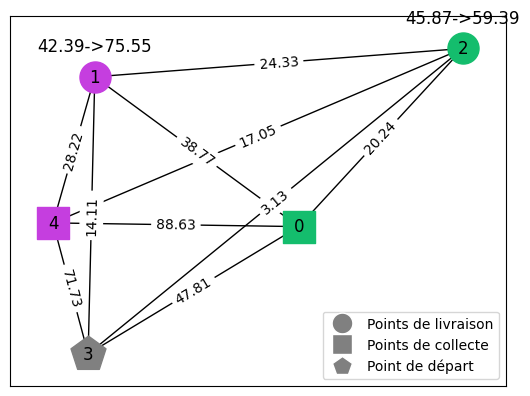

CPU times: total: 172 ms
Wall time: 188 ms


In [99]:
%%time 

instance, delivery_pickup, time_windows = generate_reduced_complete_instance(nb_nodes=5, min_weight=1, max_weight=100, max_time=100)
G = instance_to_graph(instance)

print(G)
show_instance(instance, time_windows=time_windows, delivery_pickup=delivery_pickup)

Graph with 5 nodes and 10 edges
CPU times: total: 15.6 ms
Wall time: 37.7 ms


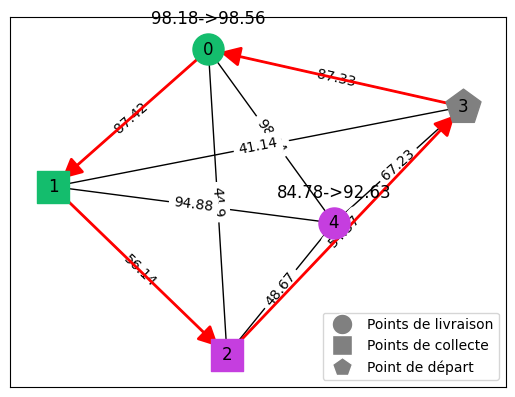

In [100]:
%%time 

instance, delivery_pickup, time_windows = generate_reduced_complete_instance(nb_nodes=5, min_weight=1, max_weight=100, max_time=100)
G = instance_to_graph(instance)
first = (set(instance) - set([*delivery_pickup.keys(), *delivery_pickup.values()])).pop()
solution = [first] + random.sample(list(i for i in range(0, 5) if i != first), k=3) + [first]

print(G)
show_solution(instance, solution, time_windows=time_windows, delivery_pickup=delivery_pickup)

## Résolution avec la programmation linéaire

### Modélisation mathématique

##### Variables de décision 
- xij=1 si on emprunte l'arc de 𝑖 à j, sinon xij=0
- ui est une variable de position pour éviter les sous-tournées, permettant de vérifier la validité du circuit.
  
Fonction objectif : Minimiser la distance totale parcourue dans la tournée :  𝑒            $$min\sum_{i,j} c_{ij} x_{ij}$$
            où  cij représente la distance entre les sommets 𝑖 et 𝑗 .

##### Contraintes
- Chaque sommet est visité exactement une fois :
                 $$\sum_{j}^{}xij=1  ∀i$$
                                   $$\sum_{i}^{}xij=1  ∀j$$
 - Contrainte de sous-tournées (MTZ - Miller-Tucker-Zemlin) pour garantir que le circuit passe par tous les sommets :
$$
u_i - u_j + N \cdot x_{ij} \leq N - 1
$$son
      Pour $i \neq j$, $u_i$ représente l'ordre de visite du sommet $i$.

- Contrainte de dépendance pour la collecte et la livraison : Si un point $p$ doit être visité avant un autre point $q$, on impose une contrainte de type :
$
u_p < u_q
$










### Implémentation

In [101]:
def linear_resolution(
    instance: dict[int, dict[int, float]],
    start: int,
    delivery_pickup: dict[int, int] = None,
    time_windows: dict[int, tuple[float, float]] = None
) -> tuple[tuple[int], float]:
    if delivery_pickup and time_windows:
        name = 'Voyageur_du_commerce_avec_contraintes_de_collecte_et_de_livraison'
    elif delivery_pickup:
        name = 'Voyageur_du_commerce_avec_contraintes_de_collecte'
    elif time_windows:
        name = 'Voyageur_du_commerce_avec_contraintes_de_temps'
    else:
        name = 'Voyageur_du_commerce'
    
    # Problème
    problem = pulp.LpProblem(name, pulp.LpMinimize)
        
    # Variables
    x = {(i, j): pulp.LpVariable(f'x_{i}_{j}', cat=pulp.LpBinary) for i in instance for j in instance if i != j}
    u = {i: pulp.LpVariable(f'u_{i}', lowBound=0, upBound=len(instance), cat=pulp.LpInteger) for i in instance}
    
    # Objectif
    problem += pulp.lpSum(x[i, j] * instance[i][j] for i in instance for j in instance if i != j)
    
    # Contraintes
    for i in instance:
        problem += pulp.lpSum(x[i, j] for j in instance if i != j) == 1
        problem += pulp.lpSum(x[j, i] for j in instance if i != j) == 1
        
    for i in instance:
        for j in instance:
            if i != j and i != start and j != start:
                problem += u[i] - u[j] + len(instance) * x[i, j] <= len(instance) - 1    
                
    if delivery_pickup:
        for i in delivery_pickup:
            problem += pulp.lpSum(x[i, j] for j in instance if i != j) == 1
            problem += pulp.lpSum(x[j, i] for j in instance if i != j) == 1
            
    if time_windows:
        for i in instance:
            if i != start and i in time_windows:
                problem += time_windows[i][0] <= u[i] <= time_windows[i][1]
    
    # Résolution
    problem.solve()
    
    # Résultat
    paths = {i: j for i in instance for j in instance if i!=j and pulp.value(x[i, j]) == 1}
    solution = [start]
    while len(solution) < len(instance):
        solution.append(paths[solution[-1]])
    
    return solution, pulp.value(problem.objective)

### Explication de l'implémentation 
- Variables : La matrice 
𝑥 contient les variables binaires indiquant si un arc est emprunté. Les variables 
𝑢
u aident à éliminer les sous-tournées en assurant un ordre de visite.
- Fonction objectif : Minimise la somme pondérée des coûts des arcs empruntés.
- Contraintes de visite : Assure que chaque point est visité exactement une fois.
- Contrainte MTZ : Évite les sous-tournées en imposant une contrainte de différence de position entre deux sommets.
- Contrainte de dépendance : Par exemple, si le point 0 doit être visité avant le point 3, on impose 
𝑢
[
0
]
<
𝑢
[
3
]
.

Cela constitue une base pour résoudre le problème de tournée de livraison avec collecte et livraison, où des points spécifiques doivent être visités dans un ordre particulier.

### Exemple

In [102]:
%%time

instance, delivery_pickup, time_windows = generate_reduced_complete_instance(10, 1, 100)
path, weight = linear_resolution(instance, 0, delivery_pickup, time_windows)

CPU times: total: 15.6 ms
Wall time: 189 ms


## Résolution du problème sans contraintes

### Définition des fonctions

#### `define_probs` 

Donne les probabilités d'aller sur chaque voisin d'une ville.

```python
def define_probs(
    neighbors_weight: dict[int, float], 
    weight_indicator: float, 
    neighbors_pheromones: dict[int, float], 
    edge_weight_weight: float, 
    pheromone_weight: float
) -> list[float]:

```

**Paramètres** :
- `neighbors_weight` (`dict[int, float]`) : Poids des arêtes des voisins.
- `weight_indicator` (`float`) : indicator of the global weight of the graph edges.
- `neighbors_pheromone` (`dict[int, float]`) : Phéromones des voisins.
- `edge_weight_weight` (`float`) : Importance du poids des arêtes.
- `pheromone_weight` (`float`) : Importance des phéromones.

**Retour** :
- Probabilités d'aller sur chaque voisin : `list[float]`.

**Exemple** :
```python
instance = generate_reduced_default_instance(10, 1, 10)
current_city = 0
instance_average_weight = weight_average(instance)
neighbors_weight = instance[current_city]
# Phéromones aléatoires (dans le cas de l'exemple)
neighbors_pheromone = {city: random.random() * 100 + 1 for city in neighbors_weight}
probs = define_probs(neighbors_weight, instance_average_weight, neighbors_pheromone, 1, 1)
```

Dans le cas où la ville 0 a $2$ voisins :
> ```
[68.49470627097703, 79.08883001035917, 72.76014911172781, 89.61624127422162, 9.964938293873091, 49.05663238942361, 35.156966687964776, 26.768444424524468, 16.227415871052294]
```

#### `weight_average`

Calcule le poids moyen des arêtes d'une instance.

```python
def weight_average(instance: dict[int, dict[int, float]]) -> float
```

**Paramètres** :
- `instance` (`dict[int, dict[int, float]]`) : Instance à résoudre.

**Retour** :
- Poids moyen des arêtes : `float`.

**Exemple** :
```python
instance = generate_reduced_default_instance(10, 1, 10)
average = weight_average(instance)
```

> ```
5.5
```

#### `ants_exploration_default`

Résout le problème sans contraintes avec l'algorithme de la colonie de fourmis.

```python
def ants_exploration_default(
    instance: dict[int, dict[int, float]], 
    start: int, 
    nb_ants: int, 
    nb_iterations: int, 
    edge_weight_weight: float = 1, 
    pheromone_weight: float = 1, 
    pheromone_deposit: float = 1, 
    evaporation_rate: float = 0.2
) -> tuple[list[int], float]
```

**Paramètres** :
- `instance` (`dict[int, dict[int, float]]`) : Instance à résoudre.
- `start` (`int`) : Ville de départ.
- `nb_ants` (`int`) : Nombre de fourmis.
- `nb_iterations` (`int`) : Nombre d'itérations.
- `edge_weight_weight` (`float`) : Importance du poids des arêtes.
- `pheromone_weight` (`float`) : Importance des phéromones.
- `pheromone_deposit` (`float`) : Quantité de phéromones déposées.
- `evaporation_rate` (`float`) : Taux d'évaporation des phéromones.

**Retour** :
- Solution trouvée et son poids total : `tuple[list[int], float]`.

**Exemple** :
```python
instance = generate_reduced_default_instance(10, 1, 10)
solution = ants_exploration_default(instance, 0, 10, 100)
```

> ```
([0, 7, 9, 6, 5, 2, 1, 8, 4, 3, 0], 26.58)
```

### Implémentation

#### `define_probs`

In [103]:
def define_probs(neighbors_weight: dict[int, float], weight_indicator: float, neighbors_pheromones: dict[int, float], edge_weight_weight: float, pheromone_weight: float) -> list[float]:
    prob = []
    for i in neighbors_weight.keys():
        probability = edge_weight_weight / (neighbors_weight[i] / weight_indicator) + pheromone_weight * neighbors_pheromones[i] # Calculation from both pheromones and the weight of the edge| a revoir pour pheromones
        prob.append(probability)
    return prob

#### `weight_average`

In [104]:
def weight_average(instance: dict[int, dict[int, float]]) -> float:
    return sum([sum(neighbors.values()) for neighbors in instance.values()]) / (len(instance) * (len(instance) - 1))

#### `ants_exploration_default`

In [105]:
def ants_exploration_default(instance: dict[int, dict[int, float]], start: int, nb_ants: int, 
                     nb_iterations: int, edge_weight_weight: float = 1, pheromone_weight: float = 1, 
                     pheromone_deposit: float = 1, evaporation_rate: float = 0.2) -> tuple[list[int], float]:
    """
    Function applying the Ant Colony Optimization algorithm to the given default instance.

    instance: The graph to input in the algorithm.
    start: The starting node of the algorithm.
    nb_ants: The number of ants to use in the algorithm.
    nb_iterations: The number of iterations to perform.
    edge_weight_weight: The weight of the edge weight in the probability calculation.
    pheromone_weight: The weight of the pheromone in the probability calculation.
    pheromone_deposit: The amount of pheromone to deposit on the edges taken by the ants.
    evaporation_rate: The rate at which the pheromones evaporate on the edges on each iteration.

    return: The optimized path found by the algorithm.
    """ 

    # Init of pheromones on each edge
    pheromones = {node: {neighbor: 1.0 for neighbor in neighbors} for node, neighbors in instance.items()}

    # Variable giving an idea of the global weight of the graph edges. Here, the average of the edges' wheight.
    weight_glob_indicator = weight_average(instance)

    best_path = []
    best_path_weight = float('inf')

    for _ in range(nb_iterations) :
        # List with lists representing each ant path
        ants_paths = [[start] for _ in range(nb_ants)]

        for i in range(nb_ants):
            current_node = start
            
            # List to keep track of visited nodes, to avoid looping.
            visited_nodes = [start]

            while len(visited_nodes) < len(instance):
                copy_instance = deepcopy(instance[current_node])

                # Remove the neighbors from the copy
                for neighbor, _ in instance[current_node].items():
                    # Remove the already visited neighbors
                    if neighbor in visited_nodes:
                        del copy_instance[neighbor]

                # Get the probabilities to choose each neighbor
                probs = define_probs(copy_instance, weight_glob_indicator, pheromones[current_node], edge_weight_weight, pheromone_weight)
                result = random.choices(list(copy_instance.keys()), probs)[0]

                # Keep the path from our current node to the next one
                ants_paths[i].append(result)

                current_node = result
                visited_nodes.append(current_node)

            ants_paths[i].append(start)
        
        # Deposit pheromones on each edge taken by each ant
        for path in ants_paths:
            path_weight = sum(instance[path[i]][path[i + 1]] for i in range(len(path) - 1))

            # Update the best path
            if path_weight < best_path_weight:
                best_path = path
                best_path_weight = path_weight

            # Add the pheromones proportionally to the path's weight
            for i in range(len(path) - 1):
                pheromones[path[i]][path[i+1]] += pheromone_deposit / (path_weight / weight_glob_indicator)
        
        # Evaporate pheromones on each edge
        for node, neighbors in pheromones.items():
            for neighbor in neighbors:
                pheromones[node][neighbor] *= (1 - evaporation_rate)  
                 

    return best_path, best_path_weight

### Exemple

In [106]:
%%time

instance = generate_reduced_default_instance(nb_nodes=500, min_weight=1, max_weight=100)
solution = ants_exploration_default(instance, 0, 10, 10)

CPU times: total: 46.6 s
Wall time: 46.8 s


## Résolution du problème avec contrainte de dépendance

### Définition des fonctions

#### `ants_exploration_pickup`

Résous le problème avec la contrainte de dépendance grâce à l'algorithme de la colonie de fourmis.

```python
def ants_exploration_pikcup(
    instance: dict[int, dict[int, float]], 
    start: int, 
    delivery_pickup: dict[int, int],
    nb_ants: int, 
    nb_iterations: int, 
    edge_weight_weight: float = 1, 
    pheromone_weight: float = 1, 
    pheromone_deposit: float = 1, 
    evaporation_rate: float = 0.2
) -> tuple[list[int], float]
```

**Paramètres** :
- `instance` (`dict[int, dict[int, float]]`) : Instance à résoudre.
- `start` (`int`) : Ville de départ.
- `delivery_pickup` (`dict[int, int]`) : Association des points de collecte et de livraison.
- `nb_ants` (`int`) : Nombre de fourmis.
- `nb_iterations` (`int`) : Nombre d'itérations.
- `edge_weight_weight` (`float`) : Importance du poids des arêtes.
- `pheromone_weight` (`float`) : Importance des phéromones.
- `pheromone_deposit` (`float`) : Quantité de phéromones déposées.
- `evaporation_rate` (`float`) : Taux d'évaporation des phéromones.

**Retour** :
- Solution trouvée et son poids total : `tuple[list[int], float]`.

**Exemple** :
```python
instance, delivery_pickup = generate_reduced_pickup_instance(10, 1, 10)
solution = ants_exploration_pickup(instance, delivery_pickup, 0, 10, 100)
```

> ```
([0, 3, 6, 1, 8, 4, 9, 7, 5, 2, 0], 27.47)
```

### Implémentation

#### `ants_exploration_pickup`

In [107]:
def ants_exploration_pickup(instance: dict[int, dict[int, float]], delivery_pickup: dict[int, int], start: int, 
                     nb_ants: int, nb_iterations: int, edge_weight_weight: float = 1, 
                     pheromone_weight: float = 1, pheromone_deposit: float = 1, evaporation_rate: float = 0.2) -> tuple[list[int], float]:
    """
    Function applying the Ant Colony Optimization algorithm to the given default instance.

    instance: The graph to input in the algorithm.
    pickup_deliveries: The dictionary indicating the pickup node for each delivery node.
    start: The starting node of the algorithm.
    nb_ants: The number of ants to use in the algorithm.
    nb_iterations: The number of iterations to perform.
    edge_weight_weight: The weight of the edge weight in the probability calculation.
    pheromone_weight: The weight of the pheromone in the probability calculation.
    pheromone_deposit: The amount of pheromone to deposit on the edges taken by the ants.
    evaporation_rate: The rate at which the pheromones evaporate on the edges on each iteration.

    return: The optimized path found by the algorithm.
    """ 

    # Init of pheromones on each edge
    pheromones = {node: {neighbor: 1.0 for neighbor in neighbors} for node, neighbors in instance.items()}

    # Variable giving an idea of the global weight of the graph edges. Here, the average of the edges' wheight.
    weight_glob_indicator = weight_average(instance)

    best_path = []
    best_path_weight = float('inf')

    for _ in range(nb_iterations) :
        # List with lists representing each ant path
        ants_paths = [[start] for _ in range(nb_ants)]

        for i in range(nb_ants):
            current_node = start

            # List to keep track of visited nodes, to avoid looping.
            visited_nodes = [start]

            while len(visited_nodes) < len(instance):
                copy_instance = deepcopy(instance[current_node])

                # Remove the neighbors from the copy
                for neighbor, _ in instance[current_node].items():
                    # Remove the already visited neighbors
                    if neighbor in visited_nodes:
                        del copy_instance[neighbor]
                        continue
                        
                    # Remove the neighbors which are delivery points and for which we have not visited the pickup point
                    if delivery_pickup.get(neighbor) and delivery_pickup[neighbor] not in visited_nodes:
                        del copy_instance[neighbor]
                        
                # Get the probabilities to choose each neighbor
                probs = define_probs(copy_instance, weight_glob_indicator, pheromones[current_node], edge_weight_weight, pheromone_weight)
                result = random.choices(list(copy_instance.keys()), probs)[0]

                # Keep the path from our current node to the next one
                ants_paths[i].append(result)

                current_node = result
                visited_nodes.append(current_node)

            ants_paths[i].append(start)
        
        # Deposit pheromones on each edge taken by each ant
        for path in ants_paths:
            path_weight = sum(instance[path[i]][path[i + 1]] for i in range(len(path) - 1))

            # Update the best path
            if path_weight < best_path_weight:
                best_path = path
                best_path_weight = path_weight

            # Add the pheromones proportionally to the path's weight
            for i in range(len(path) - 1):
                pheromones[path[i]][path[i+1]] += pheromone_deposit / (path_weight / weight_glob_indicator)
        
        # Evaporate pheromones on each edge
        for node, neighbors in pheromones.items():
            for neighbor in neighbors:
                pheromones[node][neighbor] *= (1 - evaporation_rate)


    return best_path, best_path_weight

### Exemple

In [ ]:
%%time

instance, delivery_pickup = generate_reduced_pickup_instance(nb_nodes=500, min_weight=1, max_weight=100)
solution = ants_exploration_pickup(instance, delivery_pickup, 0, 10, 10)

CPU times: total: 734 ms
Wall time: 799 ms


## Résolution du problème avec contrainte temporelle

### Définition des fonctions

#### `define_probs_time`

Donne les probabilités d'aller sur chaque voisin d'une ville en prenant en compte les avances et retards sur leur fenêtre de livraison.

```python
def define_probs_time(
    neighbors_weights: dict[int, float], 
    weight_indicator: float, 
    neighbors_pheromones: dict[int, float], 
    time_windows: dict[int, tuple[float, float]],
    edge_weight_weight: float, 
    pheromone_weight: float, 
    time_weight: float,  
    current_weight: float
) -> list[float]
```

**Paramètres** :
- `neighbors_weight` (`dict[int, float]`) : Poids des arêtes des voisins.
- `weight_indicator` (`float`) : Indicator of the global weight of the graph edges.
- `neighbors_pheromone` (`dict[int, float]`) : Phéromones des voisins.
- `time_windows` (`dict[int, tuple[float, float]]`) : fenêtres de temps pour chaque sommet.
- `edge_weight_weight` (`float`) : Importance du poids des arêtes.
- `pheromone_weight` (`float`) : Importance des phéromones.
- `time_weight` (`float`) : Importance des écarts à la fenêtre de temps.
- `current_weight` (`float`) : Le poids total du chemin, avant selection du voisin.

**Retour** :
- Probabilités d'aller sur chaque voisin : `list[float]`.

**Exemple** :
```python
instance, time_windows = generate_reduced_time_instance(10, 1, 10)
instance_weight_average = weight_average(instance)
current_city = 0
neighbors_weight = instance[current_city]
# Phéromones aléatoires (dans le cas de l'exemple)
neighbors_pheromone = {city: random.random() * 100 + 1 for city in neighbors_weight}
probs = define_probs_time(neighbors_weight, instance_weight_average, neighbors_pheromone, time_windows, 1, 1, 1, 0)
```

On considère que l'on est au début du parcours (current_weight = 0) :
> ```
[1.8524466270381899, 1.3456712476064734, 0.37514113162469126, 8.758953141481014, 64.79785491163818, 18.270601213095105, 1.2763846323084904, 3.2907992180449455, 0.17055803975601622]
```

#### `ants_exploration_time`

Résous le problème avec l'algorithme de la colonie de fourmis en prenant en compte la contrainte de fenêtre de temps.

```python
def ants_exploration_time(
    instance: dict[int, dict[int, float]], 
    time_windows: dict[int, tuple[float, float]], 
    start: int, 
    nb_ants: int, 
    nb_iterations: int, 
    edge_weight_weight: float = 1, 
    pheromone_weight: float = 1, 
    time_weight: float = 1 , 
    pheromone_deposit: float = 1, 
    evaporation_rate: float = 0.2
) -> tuple[list[int], float]:
```

**Paramètres** :
- `instance` (`dict[int, dict[int, float]]`) : Instance à résoudre.
- `time_windows` (`dict[int, tuple[float, float]]`) : Dictionnaire des fenêtres de temps pour chaque point de livraison.
- `start` (`int`) : Ville de départ.
- `nb_ants` (`int`) : Nombre de fourmis.
- `nb_iterations` (`int`) : Nombre d'itérations.
- `edge_weight_weight` (`float`) : Importance du poids des arêtes.
- `pheromone_weight` (`float`) : Importance des phéromones.
- `time_weight` (`floa`t) : Importance des écarts à la fenêtre de temps.
- `pheromone_deposit` (`float`) : Quantité de phéromones déposées.
- `evaporation_rate` (`float`) : Taux d'évaporation des phéromones.

**Retour** :
- Solution trouvée et son poids total : `tuple[list[int], float]`.

**Exemple** :
```python
instance, time_windows = generate_reduced_time_instance(10, 1, 10)
solution = ants_exploration_time(instance, time_windows, 0, nb_ants=150, nb_iterations=150)
```

> ```
([0, 4, 5, 8, 6, 1, 9, 2, 3, 7, 0], 115.71005297209044)
```

### Implémentation

#### `define_probs_time`

In [109]:
def define_probs_time(neighbors_weights: dict[int, float], weight_indicator: float, neighbors_pheromones: dict[int, float], time_windows: dict[int, tuple[float, float]],
                      edge_weight_weight: float, pheromone_weight: float, time_weight: float,  current_weight: float) -> list[float]:
    prob = []
    for i in neighbors_weights.keys():
        time_penalty = 1

        if time_windows.get(i):
            neighbor_weight = current_weight + neighbors_weights[i]
            if neighbor_weight > time_windows[i][1]:
                time_penalty = time_weight * (neighbor_weight - time_windows[i][1])
            elif neighbor_weight < time_windows[i][0]:
                time_penalty = time_weight * (time_windows[i][0] - neighbor_weight)

        probability = (edge_weight_weight / (neighbors_weights[i] / weight_indicator) + pheromone_weight * neighbors_pheromones[i]) / time_penalty
        prob.append(probability)
    return prob

#### `ants_exploration_time`

In [110]:
def ants_exploration_time(instance: dict[int, dict[int, float]], time_windows: dict[int, tuple[float, float]], start: int, 
                     nb_ants: int, nb_iterations: int, edge_weight_weight: float = 1, 
                     pheromone_weight: float = 1, time_weight: float = 1 , pheromone_deposit: float = 1, 
                     evaporation_rate: float = 0.2) -> tuple[list[int], float]:
    """
    Function applying the Ant Colony Optimization algorithm to the given default instance.

    instance: The graph to input in the algorithm.
    time_windows: The dictionary indicating the time windows for each node.
    start: The starting node of the algorithm.
    nb_ants: The number of ants to use in the algorithm.
    nb_iterations: The number of iterations to perform.
    edge_weight_weight: The weight of the edge weight in the probability calculation.
    pheromone_weight: The weight of the pheromone in the probability calculation.
    time_weight: The weight of the time penalty in the probability calculation.
    pheromone_deposit: The amount of pheromone to deposit on the edges taken by the ants.
    evaporation_rate: The rate at which the pheromones evaporate on the edges on each iteration.

    return: The optimized path found by the algorithm.
    """ 

    # Init of pheromones on each edge
    pheromones = {node: {neighbor: 1.0 for neighbor in neighbors} for node, neighbors in instance.items()}

    # Variable giving an idea of the global weight of the graph edges. Here, the average of the edges' wheight.
    weight_glob_indicator = weight_average(instance)

    best_path = []
    best_path_weight = float('inf')

    for _ in range(nb_iterations) :
        # List with lists representing each ant path
        ants_paths = [[start] for _ in range(nb_ants)]

        for i in range(nb_ants):
            current_node = start
            # List to keep track of visited nodes, to avoid looping.
            visited_nodes = [start]

            while len(visited_nodes) < len(instance):
                copy_instance = deepcopy(instance[current_node])

                # Remove the neighbors from the copy
                for neighbor, _ in instance[current_node].items():
                    # Remove the already visited neighbors
                    if neighbor in visited_nodes:
                        del copy_instance[neighbor]

                # Calculation of the sum of the weights of the nodes already visited by the ant
                current_weight = sum(instance[ants_paths[i][j]][ants_paths[i][j + 1]] for j in range(len(ants_paths[i]) - 1))
                if current_weight < time_windows[current_node][0]:
                    current_weight = time_windows[current_node][0]

                # Get the probabilities to choose each neighbor
                probs = define_probs_time(copy_instance, weight_glob_indicator, pheromones[current_node], time_windows, edge_weight_weight, pheromone_weight, time_weight, current_weight)
                result = random.choices(list(copy_instance.keys()), probs)[0]

                # Keep the path from our current node to the next one
                ants_paths[i].append(result)

                current_node = result
                visited_nodes.append(current_node)

            ants_paths[i].append(start)
        
        # Deposit pheromones on each edge taken by each ant
        for path in ants_paths:
            path_weight = 0

            # Update the path weight if the ant arrives before the time window
            for i in range(len(path) - 1):
                if path_weight < time_windows[path[i]][0]:
                    path_weight = time_windows[path[i]][0]
                path_weight += instance[path[i]][path[i + 1]]

            # Update the best path
            if path_weight < best_path_weight:
                best_path = path
                best_path_weight = path_weight

            # Add the pheromones proportionally to the path's weight
            for i in range(len(path) - 1):
                pheromones[path[i]][path[i+1]] += pheromone_deposit / (path_weight / weight_glob_indicator)
        
        # Evaporate pheromones on each edge
        for node, neighbors in pheromones.items():
            for neighbor in neighbors:
                pheromones[node][neighbor] *= (1 - evaporation_rate)


    return best_path, best_path_weight

### Exemple

In [ ]:
%%time

instance, time_windows = generate_reduced_time_instance(nb_nodes=500, min_weight=1, max_weight=100)
solution = ants_exploration_time(instance, time_windows, 0, 10, 10)

CPU times: total: 734 ms
Wall time: 822 ms


## Résolution du problème

### Définition des fonctions

#### `ants_exploration_complete`

Résous le problème avec l'algorithme de la colonie de fourmis en prenant en compte la contrainte des points de collecte et des fenêtre temporelles.

```python
def ants_exploration_complete(
    instance: dict[int, dict[int, float]], 
    delivery_pickup: dict[int, int], 
    time_windows: dict[int, tuple[float, float]], 
    start: int, 
    nb_ants: int, 
    nb_iterations: int, 
    edge_weight_weight: float = 1, 
    pheromone_weight: float = 1, 
    time_weight: float = 1 , 
    pheromone_deposit: float = 1, 
    evaporation_rate: float = 0.2
) -> tuple[list[int], float]:
```

**Paramètres** :
- `instance` (`dict[int, dict[int, float]]`) : Instance à résoudre.
- `delivery_pickup` (`dict[int, int]`) : Dictionnaire associant les points de livraison et points de collecte.
- `time_windows` (`dict[int, tuple[float, float]]`) : Dictionnaire des fenêtres de temps pour chaque point de livraison.
- `start` (`int`) : Ville de départ.
- `nb_ants` (`int`) : Nombre de fourmis.
- `nb_iterations` (`int`) : Nombre d'itérations.
- `edge_weight_weight` (`float`) : Importance du poids des arêtes.
- `pheromone_weight` (`float`) : Importance des phéromones.
- `time_weight` (`floa`t) : Importance des écarts à la fenêtre de temps.
- `pheromone_deposit` (`float`) : Quantité de phéromones déposées.
- `evaporation_rate` (`float`) : Taux d'évaporation des phéromones.

**Retour** :
- Solution trouvée et son poids total : `tuple[list[int], float]`.

**Exemple** :
```python
instance, delivery_pickup, time_windows = generate_reduced_complete_instance(10, 1, 10)
solution = ants_exploration_complete(instance, delivery_pickup, time_windows, 0, 10, 100)
```

> ```
([0, 6, 9, 2, 5, 8, 3, 1, 4, 7, 0], 98.08946486648401)
```

### Implémentation

#### `ants_exploration_complete`

In [112]:
def ants_exploration_complete(instance: dict[int, dict[int, float]], delivery_pickup: dict[int, int], time_windows: dict[int, tuple[float, float]], start: int, 
                     nb_ants: int, nb_iterations: int, edge_weight_weight: float = 1, 
                     pheromone_weight: float = 1, time_weight: float = 1 , pheromone_deposit: float = 1, 
                     evaporation_rate: float = 0.2) -> tuple[list[int], float]:
    """
    Function applying the Ant Colony Optimization algorithm to the given default instance.

    instance: The graph to input in the algorithm.
    pickup_deliveries: The dictionary indicating the pickup node for each delivery node.
    time_windows: The dictionary indicating the time windows for each node.
    start: The starting node of the algorithm.
    nb_ants: The number of ants to use in the algorithm.
    nb_iterations: The number of iterations to perform.
    edge_weight_weight: The weight of the edge weight in the probability calculation.
    pheromone_weight: The weight of the pheromone in the probability calculation.
    time_weight: The weight of the time penalty in the probability calculation.
    pheromone_deposit: The amount of pheromone to deposit on the edges taken by the ants.
    evaporation_rate: The rate at which the pheromones evaporate on the edges on each iteration.

    return: The optimized path found by the algorithm.
    """ 

    # Init of pheromones on each edge
    pheromones = {node: {neighbor: 1.0 for neighbor in neighbors} for node, neighbors in instance.items()}

    # Variable giving an idea of the global weight of the graph edges. Here, the average of the edges' wheight.
    weight_glob_indicator = weight_average(instance)

    best_path = []
    best_path_weight = float('inf')

    for _ in range(nb_iterations) :
        # List with lists representing each ant path
        ants_paths = [[start] for _ in range(nb_ants)]

        for i in range(nb_ants):
            current_node = start
            
            # List to keep track of visited nodes, to avoid looping.
            visited_nodes = [start]

            while len(visited_nodes) < len(instance):
                copy_instance = deepcopy(instance[current_node])

                # Remove the neighbors from the copy
                for neighbor, _ in instance[current_node].items():
                    # Remove the already visited neighbors
                    if neighbor in visited_nodes:
                        del copy_instance[neighbor]
                        continue
                    # Remove the neighbors which are delivery points and for which we have not visited the pickup point
                    if delivery_pickup.get(neighbor) and delivery_pickup[neighbor] not in visited_nodes:
                        del copy_instance[neighbor]

                # Calculation of the sum of the weights of the nodes already visited by the ant
                current_weight = sum(instance[ants_paths[i][j]][ants_paths[i][j + 1]] for j in range(len(ants_paths[i]) - 1))
                # Update the weight of the path if the ant arrives before the time window
                if time_windows.get(current_node) and current_weight < time_windows[current_node][0]:
                    current_weight = time_windows[current_node][0]

                # Get the probabilities to choose each neighbor
                probs = define_probs_time(copy_instance, weight_glob_indicator, pheromones[current_node], time_windows, edge_weight_weight, pheromone_weight, time_weight, current_weight)
                result = random.choices(list(copy_instance.keys()), probs)[0]

                # Keep the path from our current node to the next one
                ants_paths[i].append(result)

                current_node = result
                visited_nodes.append(current_node)

            ants_paths[i].append(start)
        
        # Deposit pheromones on each edge taken by each ant
        for path in ants_paths:
            path_weight = 0

            # Update the path weight if the ant arrives before the time window
            for i in range(len(path) - 1):
                if time_windows.get(path[i]) and path_weight < time_windows[path[i]][0]:
                    path_weight = time_windows[path[i]][0]
                path_weight += instance[path[i]][path[i + 1]]

            # Update the best path
            if path_weight < best_path_weight:
                best_path = path
                best_path_weight = path_weight

            # Add the pheromones proportionally to the path's weight
            for i in range(len(path) - 1):
                pheromones[path[i]][path[i + 1]] += pheromone_deposit / (path_weight / weight_glob_indicator)
        
        # Evaporate pheromones on each edge
        for node, neighbors in pheromones.items():
            for neighbor in neighbors:
                pheromones[node][neighbor] *= (1 - evaporation_rate)


    return best_path, best_path_weight

### Exemple

In [ ]:
%%time

instance, delivery_pickup, time_windows = generate_reduced_complete_instance(nb_nodes=500, min_weight=1, max_weight=100)
solution = ants_exploration_complete(instance, delivery_pickup, time_windows, 0, 10, 10)

CPU times: total: 844 ms
Wall time: 859 ms


# Plan d'expérience 

## Pourquoi et comment en faire un ?

Un plan d'expérience est une méthode structurée pour organiser et réaliser des expériences ou tests afin de recueillir des données de manière contrôlée et efficace. Il est essentiel pour évaluer de façon systématique l’effet de différents facteurs (paramètres) sur les performances d’un algorithme ou sur un processus, en minimisant les biais et en maximisant la fiabilité des résultats.

Dans le contexte de l’optimisation (comme pour les méta-heuristiques), un plan d'expérience permet de tester les paramètres des algorithmes et de comparer leur efficacité dans différentes conditions. Un plan d'expérience est donc indispensable pour répondre aux questions suivantes :
- Quelle combinaison de paramètres maximise la performance de l’algorithme ?
- Quel est l’impact de chaque paramètre sur les résultats ?
- Quels sont les paramètres critiques sur lesquels se concentrer pour l’optimisation ?
- Comment les performances se maintiennent-elles selon les variations de taille ou de complexité du problème ?

## Paramètres à faire varier

<!--

| Nom                  | Description                       | Type                |
| -------------------- | --------------------------------- | ------------------- |
| `nb_ants`            | Nombre de fourmis dans la colonie | Entier $\mathbb{N}$ |
| `nb_iterations`      | Nombre d'itérations               | Entier $\mathbb{N}$ |
| `pheromone_weight`   | Importance des phéromones         | Réel $\mathbb{R}$   |
| `edge_weight_weight` | Importance du poids des liens     | Réel $\mathbb{R}$   |
| `evaporation_rate`   | Taux d'évaporation des phéromones | Réel $\mathbb{R}$   |
| `pheromones_deposit` | Constante de dépôt de phéromones  | Réel $\mathbb{R}$   |

Si on considère la contrainte temporelle, on doit ajouter un paramètre correspondant à l'importance de l'arrivée en retard à un point de livraison : 

| Nom                  | Description                       | Type                |
| -------------------- | --------------------------------- | ------------------- |
| `time_weight`        | importance des retards            | Réel $\mathbb{R}$   |

-->

<table style="width:100%">
    <thead>
        <tr>
            <th>Nom</th>
            <th>Description</th>
            <th>Type</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><code>nb_ants</code></td>
            <td>Nombre de fourmis dans la colonie</td>
            <td>Entier $\mathbb{N}$</td>
        </tr>
        <tr>
            <td><code>nb_iterations</code></td>
            <td>Nombre d'itérations</td>
            <td>Entier $\mathbb{N}$</td>
        </tr>
        <tr>
            <td><code>pheromone_weight</code></td>
            <td>Importance des phéromones</td>
            <td>Réel $\mathbb{R}$</td>
        </tr>
        <tr>
            <td><code>edge_weight_weight</code></td>
            <td>Importance du poids des liens</td>
            <td>Réel $\mathbb{R}$</td>
        </tr>
        <tr>
            <td><code>evaporation_rate</code></td>
            <td>Taux d'évaporation des phéromones</td>
            <td>Réel $\mathbb{R}$</td>
        </tr>
        <tr>
            <td><code>pheromones_deposit</code></td>
            <td>Constante de dépôt de phéromones</td>
            <td>Réel $\mathbb{R}$</td>
        </tr>
    </tbody>
</table>

Si on considère la contrainte temporelle, on doit ajouter un paramètre correspondant à l'importance de l'arrivée en retard à un point de livraison :

<table style="width:100%">
    <thead>
        <tr>
            <th>Nom</th>
            <th>Description</th>
            <th>Type</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><code>time_weight</code></td>
            <td>Importance des écarts avec la fenêtre de temps</td>
            <td>Réel $\mathbb{R}$</td>
        </tr>
    </tbody>
</table>

Nous avons remarqué que certains des paramètres à faire varier peuvent dépendre de l'instance utilisée. Par exemple, pour que la quantité de phéromones (`pheromones_deposit`) ait une influence sur le déroulement de l'algorithme, il faut que celle-ci soit similaire aux poids des arêtes. Une quantité de $2$ n'aura presque aucune influence si les poids des arêtes valent environ $1000$.

De même, nous avons constaté que certains paramètres sont très liés. Par exemple, l'importance des phéromones (`pheromone_weight`) est liée à la quantité de phéromones déposées (`pheromones_deposit`) dans leur manière d'influencer l'algorithme.

On cherche à déterminer quelles combinaison de paramètres est la plus optimale. Une combinaison est considérée comme optimale si elle permet de trouver le plus court chemin entre la ville de départ et la ville d'arrivée tout en minimisant le temps de calcul.

## Type de plan d'expérience 

Un plan d'expérience peut être réalisé de deux manières différentes : 
- Un plan d'expérience **complet** où on teste tous les paramètres entre eux, on a donc $nb\_val\_param\_1\ *\ ...\ *\ nb\_val\_param\_6\ *\ itérations$ exécutions de notre algorithme de résolution. En prenant $6$ paramètres variant entre $5$ valeurs et $10$ itérations par combinaison de paramètres, on devra exécuter l'algorithme $5^6*10=156250$ fois. On se rend compte rapidement que le nombre d'exécutions est beaucoup trop grand, il faut donc le réduire.
- Un plan d'expérience **fractionnaire** où on ne teste que la variation de certains paramètres les uns par rapport aux autres.

Au vu du nombre de paramètres à tester, nous sommes partis sur un plan d'expérience fractionnaire. Pour cela, nous allons commencer par tester tous les paramètres indépendamment en fixant les autres paramètres sur une valeur par défaut. Ensuite, nous testerons les paramètres les plus influents entre eux.

Nous pouvons essayer de regrouper les paramètres : 
- `pheromone_weight` et `pheromones_deposit`
- `pheromone_weight` et `edge_weight_weight`

## Métriques

- **Temps de calcul** : temps nécessaire pour trouver le plus court cycle par l'algorithme de la colonie de fourmis.
- **Durée** : durée de parcours du chemin trouvé par l'algorithme. Généralement, on considérera surtout la distance entre la durée de parcours de l'algorithme de la colonie de fourmis et la durée de parcours l'algorithme en programmation linéaire (considéré comme borne supérieure). Cela permet de s'affranchir de l'instance considérée.

## Présentation des résultats

Nous présenterons les résultats de différentes manières en fonction du nombre de paramètres à faire varier : 
- Pour un paramètre :
  - Courbe : On peut utiliser une courbe de la durée de parcours en fonction de la valeur du paramètre. Ce graphique pourra également intégrer le minimum et le maximum pour chaque valeur du paramètre et d'autres courbes correspondant à la variation d'autres paramètres.
  - Barres : On peut également utiliser un histogramme de la durée de parcours en fonction de la valeur du paramètre.
  - Tableau : Un tableau peut servir à réunir différentes statistiques descriptives telles que la moyenne, la médiane, l'écart-type, ... de la distance à la borne supérieure.
- Pour deux paramètres : On pourra représenter les solutions sous forme d'une *heatmap* avec par exemple des couleurs allant du bleu au rouge en fonction de la distance à la borne supérieure.

L'ensemble de ces représentations nous permettra d'analyser l'effet de chaque paramètre sur l'algorithme ainsi que les interactions entre les différents paramètres.

## Implémentation

#### Définition des fonctions

##### `recursive_design_of_experiences`

Réalise un test correspondant à une itération d'un plan d'expérience et renvoi les résultats de chaque exécution de l'algorithme.

```python
def recursive_design_of_experiences(
parameters: dict[str, tuple[int | float, int | float, int, int | float] | tuple[typing.Callable, ...] | int | float | typing.Callable],
parameters_to_test: tuple[str, ...] = None,
instance: dict[int, dict[int, float]],
start: int = None,
delivery_pickup: dict[int, int] = None,
time_windows: dict[int, tuple[float, float]] = None,
iterations: int = 1
) -> list[dict[int | float], ...]
```

**Paramètres** :
- `parameters` (`dict[str, tuple[int | float, int | float, int, int | float] | tuple[typing.Callable, ...] | int | float | typing.Callable]`) : Dictionnaire des paramètres à faire varier ou non. Les valeurs de ce dictionnaire sont :
- `tuple[int | float, int | float, int, int | float]` : Sous la forme `tuple[min, max, nb_de_valeurs, par_défaut]`. Indique à la fonction que ce paramètre, s'il doit varier, doit être un intervalle entre `min` et `max` et doit comprendre `nb_valeurs` valeurs. Au contraire, si le paramètre doit rester fixe, la valeur `par_défaut` sera utilisée.
- `tuple[typing.Callable, ...]` : Indique que le paramètre est déterminé par des fonctions. Si celui-ci doit varier, alors chaque fonction représente une variation. Les fonctions prennent en arguments :
- `dict[int, dict[int, float]]` : L'instance actuellement traitée.
- `dict[int, int]` (optionnel): Association des points de collecte et points de livraison.
- `dict[int, tuple[float, float]]` (optionnel): Association d'une fenêtre de temps à chacun des points de livraison.
La fonction choisie si le paramètre ne doit pas varier est la première.
- `int | float | typing.Callable`: Indique que le paramètre est fixé.
- `parameters_to_test` (`tuple[str, ...]`) (optionnel): Liste des paramètres restant à faire varier.
- `instance` (`dict[int, dict[int, float]]`) : Instance à traiter.
- `start` (`int`) (optionnel): Point de départ. Il peut être déterminé automatiquement.
- `delivery_pickup`: (`dict[int, int]`) (optionnel): Association des points de collecte et points de livraison.
- `time_windows` (`dict[int, tuple[float, float]]`) (optionnel): Association d'une fenêtre de temps à chacun des points de livraison.
- `iterations` (`int`) (optionnel): Nombre d'itération par combinaison des paramètres. 

**Retour** :

Cette fonction retourne une liste de dictionnaires. Chaque dictionnaire représente un ensemble de tests : 
```python
{
'nb_ants': int
'nb_iterations': int
'pheromones_weight': float
'edge_weight_weight': float
'evaporation_rate': float
'pheromones_unit': int
'time_weight': float,
'values' : list[tuple[tuple[int], float], ...]
}
```

##### `design_of_experiences_iterations`

Donne le nombre d'itérations devant être réalisé par la fonction `recursive_design_of_experiences` pour terminer le plan d'expérience.

```python
def design_of_experiences_iterations(
    parameters: dict[str, tuple[int | float, int | float, int, int | float] | tuple[typing.Callable, ...] | int | float | typing.Callable],
    parameters_to_test: tuple[str, ...] = None,
    iterations: int = 1,
    has_time_windows: bool = True,
) -> int
```

**Paramètres** :
- `parameters` (`dict[str, tuple[int | float, int | float, int, int | float] | tuple[typing.Callable, ...] | int | float | typing.Callable]`) : Dictionnaire des paramètres à faire varier ou non. Les valeurs de ce dictionnaire sont :
  - `tuple[int | float, int | float, int, int | float]` : Sous la forme `tuple[min, max, nb_de_valeurs, par_défaut]`. Indique à la fonction que ce paramètre, si il doit varier, doit être un intervalle entre `min` et `max` et doit comprendre `nb_valeurs` valeurs. Au contraire, si le paramètre doit rester fixe, la valeur `par_défaut` sera utilisée.
  - `tuple[typing.Callable, ...]` : Indique que le paramètre est déterminé par des fonctions. Si celui-ci doit varier, alors chaque fonction représente une variation. Les fonctions prennent en arguments :
    - `dict[int, dict[int, float]]` : L'instance actuellement traitée.
    - `dict[int, int]` (optionnel): Association des points de collecte et points de livraison.
    - `dict[int, tuple[float, float]]` (optionnel): Association d'une fenêtre de temps à chacun des points de livraison.
    La fonction choisie si le paramètre ne doit pas varier est la première.
  - `int | float | typing.Callable`: Indique que le paramètre est fixé.
- `parameters_to_test` (`tuple[str, ...]`) (optionnel): Liste des paramètres restant à faire varier.
- `iterations` (`int`) (optionnel): Nombre d'itération par combinaison des paramètres.
- `has_time_windows` (`bool`) (optionnel): Si la contrainte de temps doit être prise en compte. Influence la prise en compte du paramètre `time_weight`.

**Retour** :

Le nombre d'itération nécessaires pour réaliser le plan d'expérience, c'est également le nombre de fois que l'algorithme de la colonie de fourmis sera exécuté.

**Exemple** :

```python
parameters = {
    'nb_ants':             (  10, 1000,   10,  100),
    'nb_iterations':       (  10, 1000,   10,  100),
    'pheromones_weight':   (  .1,   1.,   10,   .5),
    'edge_weight_weight':  (  .1,   1.,   10,   .5),
    'evaporation_rate':    (  .1,   .9,   10,   .5),
    'pheromones_unit':     (  10, 1000,   10,  100),
    'time_weight':         (  .1,   1.,   10,   .5)
}
print('Itérations :', design_of_experiences_iterations(parameters))
```
> ```
> Itérations : 1000000
> ```

$10*10*10*10*10*10*1=1000000$

##### `compare_to_upper_bound`

Compare les résultats du plan d'expérience avec la borne supérieure déterminée grâce à la programmation linéaire.

```python
def compare_to_upper_bound(
    results: list[dict[int | float], ...],
    instance: dict[int, dict[int, float]],
    start: int,
    delivery_pickup: dict[int, int] = None,
    time_windows: dict[int, tuple[float, float]] = None
) -> list[dict[int | float], ...]
```

**Paramètres** :
- `results` (`list[dict[int | float], ...]`) : Résultats du plan d'expérience.
- `instance` (`dict[int, dict[int, float]]`) : Instance à traiter.
- `start` (`int`) : Point de départ.
- `delivery_pickup`: (`dict[int, int]`) (optionnel): Association des points de collecte et points de livraison.
- `time_windows` (`dict[int, tuple[float, float]]`) (optionnel): Association d'une fenêtre de temps à chacun des points de livraison.

**Retour** :

Les résultats du plan d'expérience avec la distance à la borne supérieure. Sous la forme : 
```python
{
    'nb_ants': int
    'nb_iterations': int
    'pheromones_weight': float
    'edge_weight_weight': float
    'evaporation_rate': float
    'pheromones_unit': int
    'late_weight': float,
    'values' : list[tuple[tuple[int], float], ...]
}
```

**Exemple** :

```python
parameters = {
    'nb_ants':             (  10, 1000,   10,  100),
    'nb_iterations':       (  10, 1000,   10,  100),
    'pheromones_weight':   (  .1,   1.,   10,   .5),
    'edge_weight_weight':  (  .1,   1.,   10,   .5),
    'evaporation_rate':    (  .1,   .9,   10,   .5),
    'pheromones_unit':     (  10, 1000,   10,  100),
    'time_weight':         (  .1,   1.,   10,   .5)
}

results = recursive_design_of_experiences(parameters, instance, iterations=100)
results = compare_to_upper_bound(results, instance)
```

> ```
> [{
    'nb_ants': 10,
    'nb_iterations': 10,
    'pheromones_weight': 0.1,
    'edge_weight_weight': 0.1,
    'evaporation_rate': 0.1,
    'pheromones_unit': 10,
    'time_weight': 0.1,
    'values': [
        ((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0), 0.9),
        ((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0), 0.58),
        ...
    ]
}, ...]
```

##### `show_curve`

Affiche le résultat de la variation d'un paramètre sous la forme d'une courbe avec minimum et maximum.

```python   
def show_curve(
results: list[dict[int | float], ...],
parameter_to_show: str
) -> None
```

**Paramètres** :
- `results` (`list[dict[int | float], ...]`) : Résultats du plan d'expérience.
- `parameter_to_show` (`str`) : Paramètre à afficher, il faut que tous les autres paramètres soient fixés.

**Retour** : Rien.

**Exemple** :

```python
parameters = {
'nb_ants':             (  10, 1000,   10,  100),
'nb_iterations':       (  10, 1000,   10,  100),
'pheromones_weight':   (  .1,   1.,   10,   .5),
'edge_weight_weight':  (  .1,   1.,   10,   .5),
'evaporation_rate':    (  .1,   .9,   10,   .5),
'pheromones_unit':     (  10, 1000,   10,  100),
'time_weight':         (  .1,   1.,   10,   .5)
}
results = recursive_design_of_experiences(parameters, instance, ('nb_ants'), iterations=100)
results = compare_to_upper_bound(results, instance)
show_curve(results, 'nb_ants')
```

##### `show_hist`

Affiche un histogramme de la variation d'un paramètre.

```python
def show_hist(
results: list[dict[int | float], ...],
parameter_to_show: str
) -> None
```

**Paramètres** :
- `results` (`list[dict[int | float], ...]`) : Résultats du plan d'expérience.
- `parameter_to_show` (`str`) : Paramètre à afficher, il faut que tous les autres paramètres soient fixés.

**Retour** : Rien.

**Exemple** :

```python
parameters = {
'nb_ants':             (  10, 1000,   10,  100),
'nb_iterations':       (  10, 1000,   10,  100),
'pheromones_weight':   (  .1,   1.,   10,   .5),
'edge_weight_weight':  (  .1,   1.,   10,   .5),
'evaporation_rate':    (  .1,   .9,   10,   .5),
'pheromones_unit':     (  10, 1000,   10,  100),
'time_weight':         (  .1,   1.,   10,   .5)
}
results = recursive_design_of_experiences(parameters, instance, ('nb_ants'), iterations=100)
results = compare_to_upper_bound(results, instance)
show_hist(results, 'nb_ants')
```


##### `show_stats`

Affiche un ensemble de statistiques descriptives en rapport avec la variation d'un paramètre.

```python
def show_stats(
results: list[dict[int | float], ...],
parameter_to_show: str
) -> None
```

**Paramètres** :
- `results` (`list[dict[int | float], ...]`) : Résultats du plan d'expérience.
- `parameter_to_show` (`str`) : Paramètre à afficher, il faut que tous les autres paramètres soient fixés.

**Retour** : Rien.

**Exemple** :

```python
parameters = {
'nb_ants':             (  10, 1000,   10,  100),
'nb_iterations':       (  10, 1000,   10,  100),
'pheromones_weight':   (  .1,   1.,   10,   .5),
'edge_weight_weight':  (  .1,   1.,   10,   .5),
'evaporation_rate':    (  .1,   .9,   10,   .5),
'pheromones_unit':     (  10, 1000,   10,  100),
'time_weight':         (  .1,   1.,   10,   .5)
}
results = recursive_design_of_experiences(parameters, instance, ('nb_ants'), iterations=100)
results = compare_to_upper_bound(results, instance)

show_stats(results, 'nb_ants')
```

> ```
| Valeurs du paramètre | 10    | 20    | 30    | 40    | 50    | 60    | 70    | 80    | 90    | 100   |
| -------------------- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- |
| Moyenne              | 67.98 | 65.45 | 63.12 | 60.78 | 58.45 | 56.12 | 53.78 | 51.45 | 49.12 | 46.78 |
| Médiane              | 34.75 | 33.45 | 32.12 | 30.78 | 29.45 | 28.12 | 26.78 | 25.45 | 24.12 | 22.78 |
| Écart-type           | 12.45 | 12.12 | 11.78 | 11.45 | 11.12 | 10.78 | 10.45 | 10.12 | 9.78  | 9.45  |
| Minimum              | 10.98 | 10.78 | 10.58 | 10.38 | 10.18 | 9.98  | 9.78  | 9.58  | 9.38  | 9.18  |
| Maximum              | 12.45 | 12.25 | 12.05 | 11.85 | 11.65 | 11.45 | 11.25 | 11.05 | 10.85 | 10.65 |
```

##### `show_heatmap`

Affiche une *heatmap* permettant de comparer deux paramètres entre eux.

```python
def show_heatmap(
    results: list[dict[int | float], ...],
    parameter_1: str,
    parameter_2: str
) -> None
```

**Paramètres** :
- `results` (`list[dict[int | float], ...]`) : Résultats du plan d'expérience.
- `parameter_1` (`str`) : Premier paramètre à afficher.
- `parameter_2` (`str`) : Deuxième paramètre à afficher.

**Retour** : Rien.

**Exemple** :

```python
parameters = {
    'nb_ants':             (  10, 1000,   10,  100),
    'nb_iterations':       (  10, 1000,   10,  100),
    'pheromones_weight':   (  .1,   1.,   10,   .5),
    'edge_weight_weight':  (  .1,   1.,   10,   .5),
    'evaporation_rate':    (  .1,   .9,   10,   .5),
    'pheromones_unit':     (  10, 1000,   10,  100),
    'time_weight':         (  .1,   1.,   10,   .5)
}
results = recursive_design_of_experiences(parameters, instance, ('nb_ants'), iterations=100)
results = compare_to_upper_bound(results, instance)

show_heatmap(results, 'nb_ants', 'nb_iterations')
```

##### `show_curve_compare`

Affiche le résultat de la variation de deux paramètres l'un par rapport à l'autre sous la forme d'une courbe avec minimum et maximum.

```python
def show_curve_compare(
    results: list[dict[int | float], ...],
    parameter_1: str,
    parameter_2: str
) -> None
```

**Paramètres** :
- `results` (`list[dict[int | float], ...]`) : Résultats du plan d'expérience.
- `parameter_1` (`str`) : Premier paramètre à afficher.
- `parameter_2` (`str`) : Deuxième paramètre à afficher.

**Retour** : Rien.

**Exemple** :

```python
parameters = {
    'nb_ants':             (  10, 1000,   10,  100),
    'nb_iterations':       (  10, 1000,   10,  100),
    'pheromones_weight':   (  .1,   1.,   10,   .5),
    'edge_weight_weight':  (  .1,   1.,   10,   .5),
    'evaporation_rate':    (  .1,   .9,   10,   .5),
    'pheromones_unit':     (  10, 1000,   10,  100),
    'time_weight':         (  .1,   1.,   10,   .5)
}

results = recursive_design_of_experiences(parameters, instance, ('nb_ants', 'nb_iterations'), iterations=100)
results = compare_to_upper_bound(results, instance)

show_curve_compare(results, 'nb_ants', 'nb_iterations')
```

#### Implémentation

##### `recursive_design_of_experiences`

In [114]:
def recursive_design_of_experiences(
    parameters: dict[str, tuple[int | float, int | float, int, int | float] | tuple[typing.Callable, ...] | int | float | typing.Callable],
    parameters_to_test: tuple[str, ...],
    instance: dict[int, dict[int, float]],
    start: int = None,
    delivery_pickup: dict[int, int] = None,
    time_windows: dict[int, tuple[float, float]] = None,
    iterations: int = 1
) -> list[dict[int | float]]:
    results = []
    parameters = parameters.copy()

    if start is None:
        if delivery_pickup:
            if len(instance) % 2 == True:
                start = (set(instance.keys()) - set(delivery_pickup.keys()) - set(delivery_pickup.values())).pop()
            else:
                start = random.choice(tuple(delivery_pickup.values()))
        else:
            raise Exception("You need to provide a start point")          
    
    if not delivery_pickup and 'time_weight' in parameters:
        parameters.pop('time_weight')

    parameter_name_to_test = parameters_to_test[0]
    parameter_to_test = parameters[parameter_name_to_test]

    if isinstance(parameter_to_test, tuple):
        if callable(parameter_to_test[0]):
            if delivery_pickup and time_windows:
                parameter_values = tuple(fn(instance, delivery_pickup, time_windows) for fn in parameter_to_test)
            elif delivery_pickup:
                parameter_values = tuple(fn(instance, delivery_pickup) for fn in parameter_to_test)
            elif time_windows:
                parameter_values = tuple(fn(instance, time_windows) for fn in parameter_to_test)
            else:
                parameter_values = tuple(fn(instance) for fn in parameter_to_test)
        else:
            parameter_values = np.linspace(parameter_to_test[0], parameter_to_test[1], parameter_to_test[2])
            if isinstance(parameter_to_test[0], int):
                parameter_values = parameter_values.round().astype(int)
    else:
        parameter_values = [parameter_to_test]
        
    if len(parameters_to_test) == 1:
        for parameter_name in parameters:
            if parameter_name == parameter_name_to_test:
                continue
            if isinstance(parameters[parameter_name], tuple):
                if callable(parameters[parameter_name][0]):
                    if delivery_pickup and time_windows:
                        parameters[parameter_name] = parameters[parameter_name][0](instance, delivery_pickup, time_windows)
                    elif delivery_pickup:
                        parameters[parameter_name] = parameters[parameter_name][0](instance, delivery_pickup)
                    elif time_windows:
                        parameters[parameter_name] = parameters[parameter_name][0](instance, time_windows)
                    else:
                        parameters[parameter_name] = parameters[parameter_name][0](instance)
                else:
                    parameters[parameter_name] = parameters[parameter_name][3]
                
        if delivery_pickup and time_windows:
            for parameter_value in parameter_values:
                parameters[parameter_name_to_test] = parameter_value
                results.append({
                    **parameters, 
                    'values': tuple(ants_exploration_complete(instance, delivery_pickup, time_windows, start, **parameters) for _ in range(iterations)),
                })
        elif delivery_pickup:
            for parameter_value in parameter_values:
                parameters[parameter_name_to_test] = parameter_value
                results.append({
                    **parameters, 
                    'values': tuple(ants_exploration_pickup(instance, delivery_pickup, start, **parameters) for _ in range(iterations)),
                })
        elif time_windows:
            for parameter_value in parameter_values:
                parameters[parameter_name_to_test] = parameter_value
                results.append({
                    **parameters, 
                    'values': tuple(ants_exploration_time(instance, time_windows, start, **parameters) for _ in range(iterations)),
                })
        else:
            for parameter_value in parameter_values:
                parameters[parameter_name_to_test] = parameter_value
                results.append({
                    **parameters, 
                    'values': tuple(ants_exploration_default(instance, start, **parameters) for _ in range(iterations)),
                })
    else:
        for parameter_value in parameter_values:
            parameters[parameter_name_to_test] = parameter_value
            results.extend(recursive_design_of_experiences(parameters, parameters_to_test[1:], instance, start, delivery_pickup, time_windows, iterations))
            
    return results

##### `design_of_experiences_iterations`

In [115]:
def design_of_experiences_iterations(
    parameters: dict[str, tuple[int | float, int | float, int, int | float] | tuple[typing.Callable, ...] | int | float | typing.Callable],
    parameters_to_test: tuple[str, ...] = None,
    iterations: int = 1,
    has_time_windows: bool = True,
) -> int:    
    iters = 1

    # Si la liste des paramètres n'est pas définie, alors on fait varier l'ensemble des paramètres.
    if not parameters_to_test:
        parameters_to_test = tuple(parameters.keys())

    # Si la contrainte temprorelle n'est pas à prendre en compte, alors le paramètre associé `time_weight` n'est pas 
    # à prendre ne compte non plus.
    if not has_time_windows:
        parameters.pop('time_weight')

    # On parcours l'ensemble des paramètres et on multiplie le nombre d'itérations par le nombre de valeur à tester. 
    for parameter_name in parameters_to_test:
        parameter = parameters[parameter_name]

        # Si le paramètre est un tuple, alors les valeurs à générer font partie d'un intervalle
        # Sinon c'est un paramètre fixé.
        if isinstance(parameter, tuple):
            if callable(parameter[0]):
                iters *= len(parameter)
            else:
                iters *= parameter[2]
            
    return iters * iterations

##### `compare_to_upper_bound`

In [116]:
def compare_to_upper_bound(
    results: list[dict[int | float]],
    instance: dict[int, dict[int, float]],
    start: int,
    delivery_pickup: dict[int, int] = None,
    time_windows: dict[int, tuple[float, float]] = None
) -> list[dict[int | float]]:
    best_path, best_path_weight = linear_resolution(instance, start, delivery_pickup, time_windows)
    results_2 = []

    for result in results:
        values = []
        for value in result['values']:
            values.append((value[0], best_path_weight / value[1]))
        results_2.append({
            **result,
            'values': values
        })
    
    return results_2

##### `show_curve`

In [117]:
def show_curve(
    results: list[dict[int | float]],
    parameter_to_show: str
) -> None:
    x: list[float] = [] # Liste des valeurs du paramètre à afficher
    y: list[list[float]] = [] # Liste des valeurs des résultats pour chaque itération.
    
    for result in results:
        x.append(result[parameter_to_show])
        y.append([value[1] for value in result['values']])
        
    plt.plot(x, tuple(map(np.mean, y)), label='Moyenne')
    plt.fill_between(x, tuple(map(np.min, y)), tuple(map(np.max, y)), alpha=0.2, label='Min-Max')
    
    plt.xlabel(parameter_to_show)
    plt.ylabel('Ratio de proximité à la solution optimale')
    
    plt.show()

##### `show_hist`

In [118]:
def show_hist(
    results: list[dict[int | float]],
    parameter_to_show: str
) -> None:
    x: list[float] = [] # Liste des valeurs du paramètre à afficher
    y: list[list[float]] = [] # Liste des valeurs des résultats pour chaque itération.
    
    for result in results:
        x.append(result[parameter_to_show])
        y.extend([value[1] for value in result['values']])
        
    plt.hist(y, bins=20)
    
    plt.xlabel('Ratio de proximité au résultat optimal')
    plt.ylabel('Nombre d\'occurences')
    
    plt.show()

##### `show_stats`

In [119]:
def show_stats(
    results: list[dict[int | float]],
    parameter_to_show: str
) -> None:
    stats_to_show = {
        'Moyenne': np.mean,
        'Médianne': np.median,
        'Écart-type': np.std,
        'Minimum': np.min,
        'Maximum': np.max,
    }
    
    stats = {name: [] for name in stats_to_show}
    
    for result in results:
        for stat_name in stats_to_show:
            stats[stat_name].append(stats_to_show[stat_name]([value[1] for value in result['values']]))

    table = [[parameter_to_show] + [round(float(result[parameter_to_show]), 2) for result in results]] 
    for stat_name in stats:
        table.append([stat_name] + [round(float(v), 2) for v in stats[stat_name]])

    print(tabulate(table, tablefmt='fancy_grid'))

##### `show_heatmap`

In [120]:
def show_heatmap(
    results: list[dict[int | float]],
    parameter_to_show: str,
    parameter_to_show_2: str
) -> None:
    x: list[float] = [] # Liste des valeurs du paramètre à afficher
    y: list[float] = [] # Liste des valeurs du paramètre à afficher
    z: list[float] = [] # Liste des valeurs des résultats pour chaque itération.
    
    for result in results:
        x.append(result[parameter_to_show])
        y.append(result[parameter_to_show_2])
        z.append(np.mean([value[1] for value in result['values']]))
    
    plt.tricontourf(x, y, z, levels=14, cmap='RdBu')
    plt.colorbar()
    
    plt.xlabel(parameter_to_show)
    plt.ylabel(parameter_to_show_2)
    
    plt.show()

##### `show_parameters`

In [121]:
def show_parameters(
    parameters: dict[int | float],
    parameters_to_show: tuple[str],
    instance: dict[int, dict[int, float]],
    start: int,
    delivery_pickup: dict[int, int] = None,
    time_windows: dict[int, tuple[float, float]] = None
) -> None:
    table = [['Paramètre', 'Valeurs']]
    for parameter_name in parameters:
        if parameter_name in parameters_to_show:
            if isinstance(parameters[parameter_name], tuple):
                if callable(parameters[parameter_name][0]):
                    if delivery_pickup and time_windows:
                        values = [fn(instance, delivery_pickup, time_windows) for fn in parameters[parameter_name]]
                    elif delivery_pickup:
                        values = [fn(instance, delivery_pickup) for fn in parameters[parameter_name]]
                    elif time_windows:
                        values = [fn(instance, time_windows) for fn in parameters[parameter_name]]
                    else:
                        values = [fn(instance) for fn in parameters[parameter_name]]
                else:
                    values = np.linspace(parameters[parameter_name][0], parameters[parameter_name][1], parameters[parameter_name][2])
                    if isinstance(parameters[parameter_name][0], int):
                        values = values.round().astype(int)
            else:
                values = parameters[parameter_name]
        else:
            if isinstance(parameters[parameter_name], tuple):
                if callable(parameters[parameter_name][0]):
                    if delivery_pickup and time_windows:
                        values = parameters[parameter_name][0](instance, delivery_pickup, time_windows)
                    elif delivery_pickup:
                        values = parameters[parameter_name][0](instance, delivery_pickup)
                    elif time_windows:
                        values = parameters[parameter_name][0](instance, time_windows)
                    else:
                        values = parameters[parameter_name][0](instance)
                else:
                    values = parameters[parameter_name][3]
            else:
                values = parameters[parameter_name]
        table.append([parameter_name, str(values)])
        
    print(tabulate(table, tablefmt='fancy_grid'))

#### Exemple

Itérations :  10
╒════════════╤══════╤═══════╤═══════╤═══════╤═══════╤═══════╤═══════╤═══════╤═══════╤════════╕
│ nb_ants    │ 1    │ 12    │ 23    │ 34    │ 45    │ 56    │ 67    │ 78    │ 89    │ 100    │
├────────────┼──────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼────────┤
│ Moyenne    │ 0.35 │  0.4  │  0.4  │  0.41 │  0.41 │  0.4  │  0.41 │  0.44 │  0.42 │   0.4  │
├────────────┼──────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼────────┤
│ Médianne   │ 0.35 │  0.4  │  0.4  │  0.42 │  0.41 │  0.39 │  0.41 │  0.44 │  0.41 │   0.39 │
├────────────┼──────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼────────┤
│ Écart-type │ 0.02 │  0.02 │  0.01 │  0.02 │  0.01 │  0.01 │  0.01 │  0.03 │  0.01 │   0.02 │
├────────────┼──────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼────────┤
│ Minimum    │ 0.31 │  0.37 │  0.38 │  0.39 │  0.39 │  0.38 │  0.4  │  0.4  │  0.4  │   0.39 │
├────────────┼──────┼───────┼────

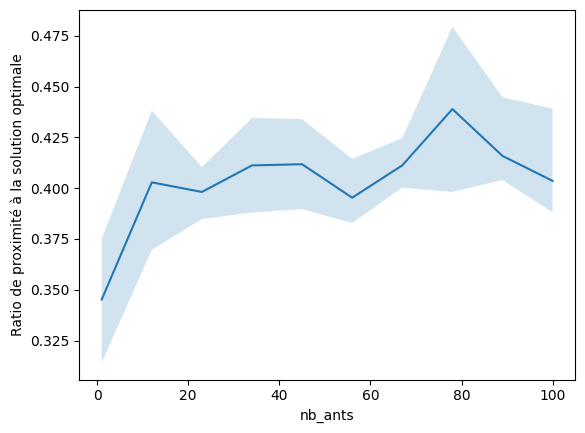

CPU times: total: 7.61 s
Wall time: 8.9 s


In [122]:
%%time

# Liste des paramètres à faire varier sous la forme d'un dictionnaire dont les valeurs sont : 
# - un tuple du minimum, maximum, nombre de valeurs à générer (int), valeur par défaut.
# - un tuple de fonction générant une valeur pour le paramètre en fonction de l'instance, 
#   des fenêtres de temps et des points de collecte. La fonction par défaut est la première.
# - une valeur fixe

parameters = {
    'nb_ants':             (   1,  100,   10,   10 ),                            # A DÉFINIR
    'nb_iterations':       (   10, 100,   10,   10 ),
    'pheromone_weight':    (  .1,   1.,   10,   .5 ),
    'edge_weight_weight':  (  .1,   1.,   10,   .5 ),
    'evaporation_rate':    (  .1,   .9,   10,   .5 ),
    'pheromone_deposit':   (  10, 1000,   10,  100 ),
    'time_weight':         (  .1,   1.,   10,   .5 )
}
parameters_to_test = ('nb_ants',)

instance, delivery_pickup, time_windows = generate_reduced_complete_instance(20, 1, 100)

print('Itérations : ', design_of_experiences_iterations(
    parameters=parameters, 
    parameters_to_test=parameters_to_test
))

results = recursive_design_of_experiences(
    parameters=parameters, 
    parameters_to_test=parameters_to_test, 
    instance=instance, 
    start=0,
    delivery_pickup=delivery_pickup, 
    time_windows=time_windows, 
    iterations=5
)
results = compare_to_upper_bound(results, instance, 0, delivery_pickup, time_windows)

show_stats(results,parameters_to_test[0])
show_curve(results,parameters_to_test[0])

## Tests

### Variations de chaque paramètre indépendament

#### nb_iterations

╒════════════════════╤═══════════════════════════════════════════╕
│ Paramètre          │ Valeurs                                   │
├────────────────────┼───────────────────────────────────────────┤
│ nb_ants            │ 10                                        │
├────────────────────┼───────────────────────────────────────────┤
│ nb_iterations      │ [ 10  20  30  40  50  60  70  80  90 100] │
├────────────────────┼───────────────────────────────────────────┤
│ pheromone_weight   │ 0.5                                       │
├────────────────────┼───────────────────────────────────────────┤
│ edge_weight_weight │ 0.5                                       │
├────────────────────┼───────────────────────────────────────────┤
│ evaporation_rate   │ 0.5                                       │
├────────────────────┼───────────────────────────────────────────┤
│ pheromone_deposit  │ 100                                       │
├────────────────────┼────────────────────────────────────────

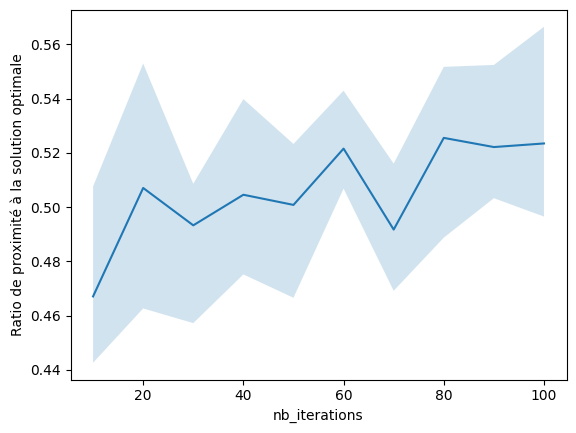

CPU times: total: 8.81 s
Wall time: 9.66 s


In [123]:
%%time

parameters = {
    'nb_ants':             (   1,  100,   10,   10 ),
    'nb_iterations':       (   10, 100,   10,   10 ),
    'pheromone_weight':    (  .1,   1.,   10,   .5 ),
    'edge_weight_weight':  (  .1,   1.,   10,   .5 ),
    'evaporation_rate':    (  .1,   .9,   10,   .5 ),
    'pheromone_deposit':   (  10, 1000,   10,  100 ),
    'time_weight':         (  .1,   1.,   10,   .5 )
}
parameters_to_test = ('nb_iterations',)

random.seed(0)
instance, delivery_pickup, time_windows = generate_reduced_complete_instance(20, 1, 100)

show_parameters(parameters, parameters_to_test, instance, 0, delivery_pickup, time_windows)
print('Itérations : ', design_of_experiences_iterations(
    parameters=parameters, 
    parameters_to_test=parameters_to_test
))

results = recursive_design_of_experiences(
    parameters=parameters, 
    parameters_to_test=parameters_to_test, 
    instance=instance, 
    start=0,
    delivery_pickup=delivery_pickup, 
    time_windows=time_windows, 
    iterations=5
)
results = compare_to_upper_bound(results, instance, 0, delivery_pickup, time_windows)

show_stats(results,parameters_to_test[0])
show_curve(results,parameters_to_test[0])

#### nb_ants

╒════════════════════╤═══════════════════════════════════════════╕
│ Paramètre          │ Valeurs                                   │
├────────────────────┼───────────────────────────────────────────┤
│ nb_ants            │ [  1  12  23  34  45  56  67  78  89 100] │
├────────────────────┼───────────────────────────────────────────┤
│ nb_iterations      │ 10                                        │
├────────────────────┼───────────────────────────────────────────┤
│ pheromone_weight   │ 0.5                                       │
├────────────────────┼───────────────────────────────────────────┤
│ edge_weight_weight │ 0.5                                       │
├────────────────────┼───────────────────────────────────────────┤
│ evaporation_rate   │ 0.5                                       │
├────────────────────┼───────────────────────────────────────────┤
│ pheromone_deposit  │ 100                                       │
├────────────────────┼────────────────────────────────────────

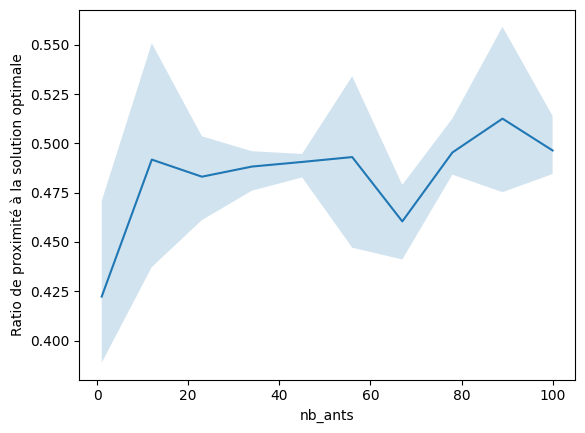

CPU times: total: 7.91 s
Wall time: 8.59 s


In [124]:
%%time

parameters = {
    'nb_ants':             (   1,  100,   10,   10 ),
    'nb_iterations':       (   10, 100,   10,   10 ),
    'pheromone_weight':    (  .1,   1.,   10,   .5 ),
    'edge_weight_weight':  (  .1,   1.,   10,   .5 ),
    'evaporation_rate':    (  .1,   .9,   10,   .5 ),
    'pheromone_deposit':   (  10, 1000,   10,  100 ),
    'time_weight':         (  .1,   1.,   10,   .5 )
}
parameters_to_test = ('nb_ants',)
instance_size = 20

random.seed(0)
instance, delivery_pickup, time_windows = generate_reduced_complete_instance(instance_size, 1, 100)

show_parameters(parameters, parameters_to_test, instance, 0, delivery_pickup, time_windows)
print('Taille de l\'instance :', instance_size, ', Itérations : ', design_of_experiences_iterations(
    parameters=parameters, 
    parameters_to_test=parameters_to_test
))

results = recursive_design_of_experiences(
    parameters=parameters, 
    parameters_to_test=parameters_to_test, 
    instance=instance, 
    start=0,
    delivery_pickup=delivery_pickup, 
    time_windows=time_windows, 
    iterations=5
)
results = compare_to_upper_bound(results, instance, 0, delivery_pickup, time_windows)

show_stats(results,parameters_to_test[0])
show_curve(results,parameters_to_test[0])

#### pheoromone_weight

╒════════════════════╤═══════════════════════════════════════════╕
│ Paramètre          │ Valeurs                                   │
├────────────────────┼───────────────────────────────────────────┤
│ nb_ants            │ 10                                        │
├────────────────────┼───────────────────────────────────────────┤
│ nb_iterations      │ 10                                        │
├────────────────────┼───────────────────────────────────────────┤
│ pheromone_weight   │ [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] │
├────────────────────┼───────────────────────────────────────────┤
│ edge_weight_weight │ 0.5                                       │
├────────────────────┼───────────────────────────────────────────┤
│ evaporation_rate   │ 0.5                                       │
├────────────────────┼───────────────────────────────────────────┤
│ pheromone_deposit  │ 100                                       │
├────────────────────┼────────────────────────────────────────

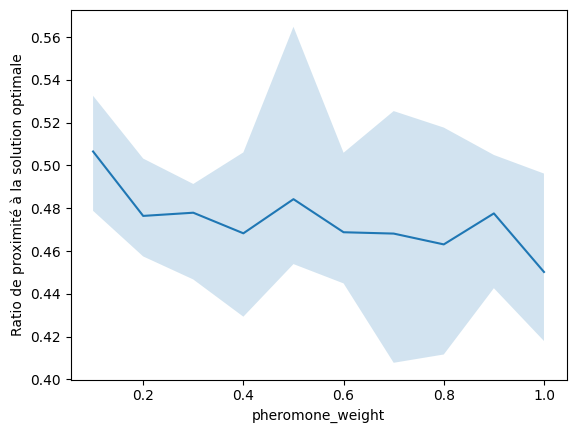

CPU times: total: 1.84 s
Wall time: 2.46 s


In [125]:
%%time

parameters = {
    'nb_ants':             (   1,  100,   10,   10 ),
    'nb_iterations':       (   10, 100,   10,   10 ),
    'pheromone_weight':    (  .1,   1.,   10,   .5 ),
    'edge_weight_weight':  (  .1,   1.,   10,   .5 ),
    'evaporation_rate':    (  .1,   .9,   10,   .5 ),
    'pheromone_deposit':   (  10, 1000,   10,  100 ),
    'time_weight':         (  .1,   1.,   10,   .5 )
}
parameters_to_test = ('pheromone_weight',)
instance_size = 20

random.seed(0)
instance, delivery_pickup, time_windows = generate_reduced_complete_instance(instance_size, 1, 100)

show_parameters(parameters, parameters_to_test, instance, 0, delivery_pickup, time_windows)
print('Taille de l\'instance :', instance_size, ', Itérations : ', design_of_experiences_iterations(
    parameters=parameters, 
    parameters_to_test=parameters_to_test
))

results = recursive_design_of_experiences(
    parameters=parameters, 
    parameters_to_test=parameters_to_test, 
    instance=instance, 
    start=0,
    delivery_pickup=delivery_pickup, 
    time_windows=time_windows, 
    iterations=5
)
results = compare_to_upper_bound(results, instance, 0, delivery_pickup, time_windows)

show_stats(results,parameters_to_test[0])
show_curve(results,parameters_to_test[0])

#### Tout

Parameter :  nb_ants
╒════════════════════╤═════════════════════════════════════════════════════╕
│ Paramètre          │ Valeurs                                             │
├────────────────────┼─────────────────────────────────────────────────────┤
│ nb_ants            │ 10                                                  │
├────────────────────┼─────────────────────────────────────────────────────┤
│ nb_iterations      │ 10                                                  │
├────────────────────┼─────────────────────────────────────────────────────┤
│ pheromone_weight   │ [ 0.1  1.2  2.3  3.4  4.5  5.6  6.7  7.8  8.9 10. ] │
├────────────────────┼─────────────────────────────────────────────────────┤
│ edge_weight_weight │ 0.5                                                 │
├────────────────────┼─────────────────────────────────────────────────────┤
│ evaporation_rate   │ 0.5                                                 │
├────────────────────┼─────────────────────────────────

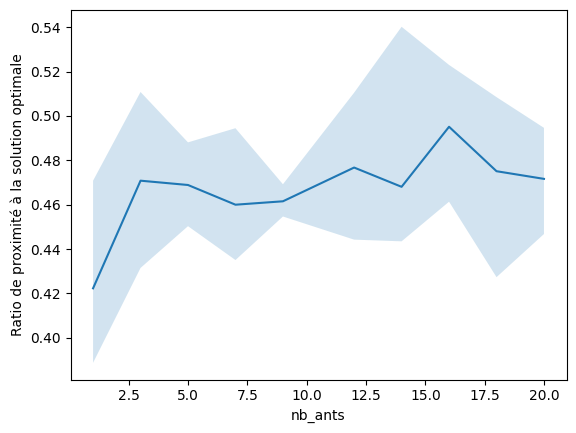

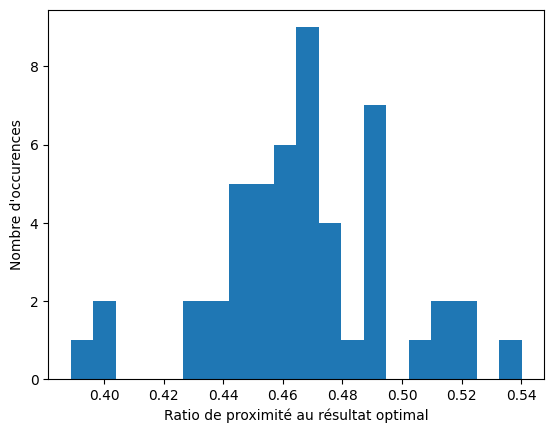

Parameter :  nb_iterations
╒════════════════════╤═════════════════════════════════════════════════════╕
│ Paramètre          │ Valeurs                                             │
├────────────────────┼─────────────────────────────────────────────────────┤
│ nb_ants            │ 10                                                  │
├────────────────────┼─────────────────────────────────────────────────────┤
│ nb_iterations      │ 10                                                  │
├────────────────────┼─────────────────────────────────────────────────────┤
│ pheromone_weight   │ [ 0.1  1.2  2.3  3.4  4.5  5.6  6.7  7.8  8.9 10. ] │
├────────────────────┼─────────────────────────────────────────────────────┤
│ edge_weight_weight │ 0.5                                                 │
├────────────────────┼─────────────────────────────────────────────────────┤
│ evaporation_rate   │ 0.5                                                 │
├────────────────────┼───────────────────────────

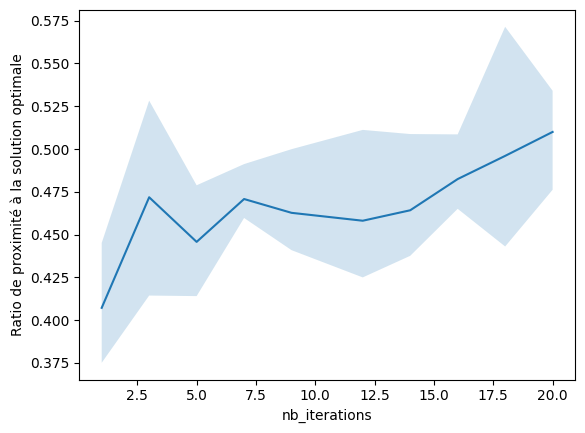

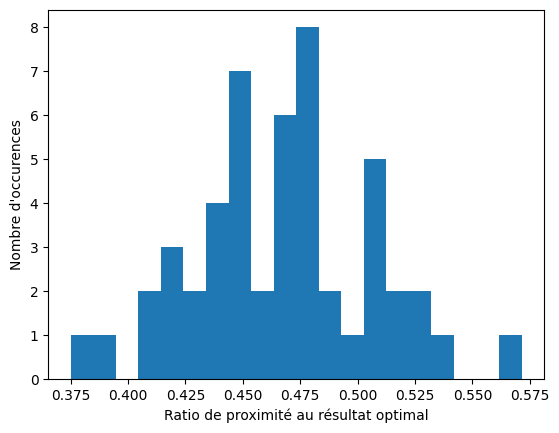

Parameter :  pheromone_weight
╒════════════════════╤═════════════════════════════════════════════════════╕
│ Paramètre          │ Valeurs                                             │
├────────────────────┼─────────────────────────────────────────────────────┤
│ nb_ants            │ 10                                                  │
├────────────────────┼─────────────────────────────────────────────────────┤
│ nb_iterations      │ 10                                                  │
├────────────────────┼─────────────────────────────────────────────────────┤
│ pheromone_weight   │ [ 0.1  1.2  2.3  3.4  4.5  5.6  6.7  7.8  8.9 10. ] │
├────────────────────┼─────────────────────────────────────────────────────┤
│ edge_weight_weight │ 0.5                                                 │
├────────────────────┼─────────────────────────────────────────────────────┤
│ evaporation_rate   │ 0.5                                                 │
├────────────────────┼────────────────────────

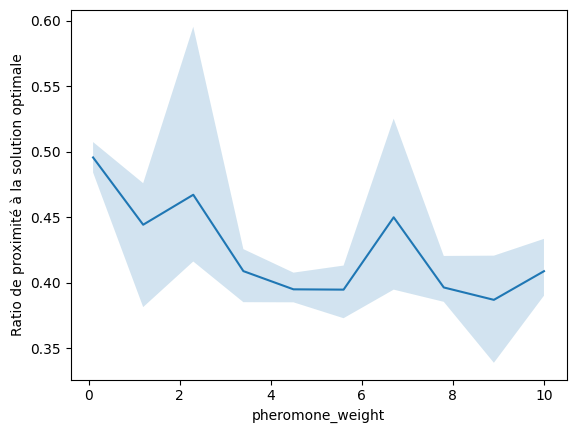

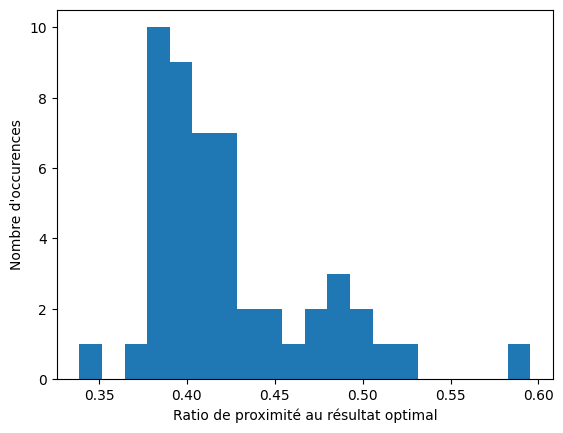

Parameter :  edge_weight_weight
╒════════════════════╤═════════════════════════════════════════════════════╕
│ Paramètre          │ Valeurs                                             │
├────────────────────┼─────────────────────────────────────────────────────┤
│ nb_ants            │ 10                                                  │
├────────────────────┼─────────────────────────────────────────────────────┤
│ nb_iterations      │ 10                                                  │
├────────────────────┼─────────────────────────────────────────────────────┤
│ pheromone_weight   │ [ 0.1  1.2  2.3  3.4  4.5  5.6  6.7  7.8  8.9 10. ] │
├────────────────────┼─────────────────────────────────────────────────────┤
│ edge_weight_weight │ 0.5                                                 │
├────────────────────┼─────────────────────────────────────────────────────┤
│ evaporation_rate   │ 0.5                                                 │
├────────────────────┼──────────────────────

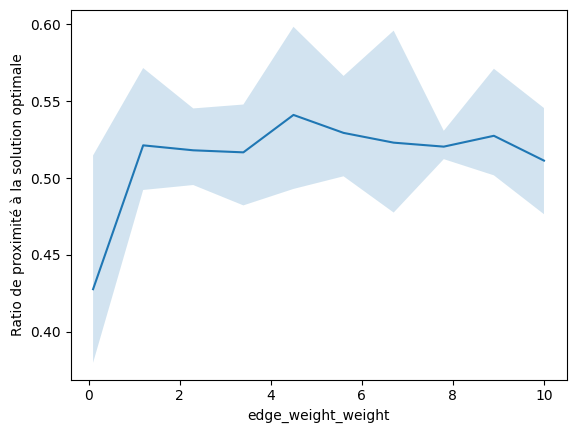

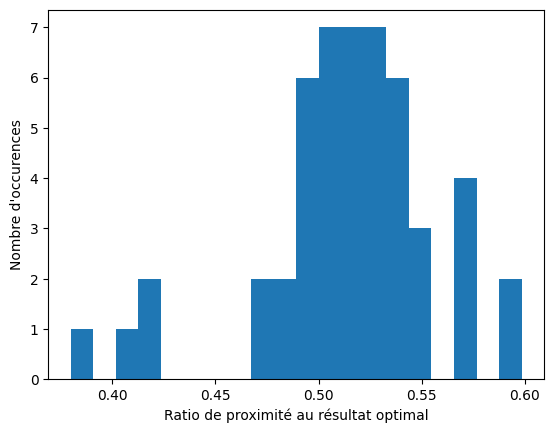

Parameter :  evaporation_rate
╒════════════════════╤═════════════════════════════════════════════════════╕
│ Paramètre          │ Valeurs                                             │
├────────────────────┼─────────────────────────────────────────────────────┤
│ nb_ants            │ 10                                                  │
├────────────────────┼─────────────────────────────────────────────────────┤
│ nb_iterations      │ 10                                                  │
├────────────────────┼─────────────────────────────────────────────────────┤
│ pheromone_weight   │ [ 0.1  1.2  2.3  3.4  4.5  5.6  6.7  7.8  8.9 10. ] │
├────────────────────┼─────────────────────────────────────────────────────┤
│ edge_weight_weight │ 0.5                                                 │
├────────────────────┼─────────────────────────────────────────────────────┤
│ evaporation_rate   │ 0.5                                                 │
├────────────────────┼────────────────────────

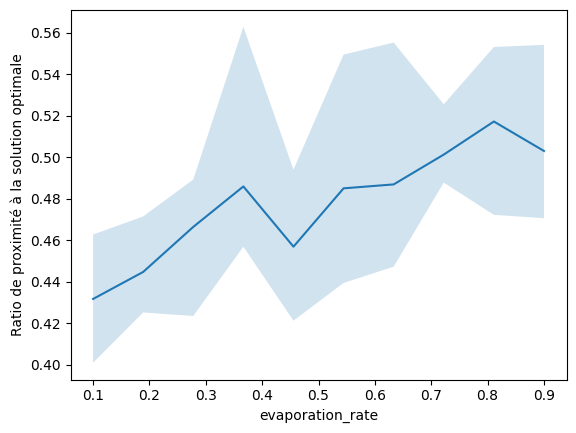

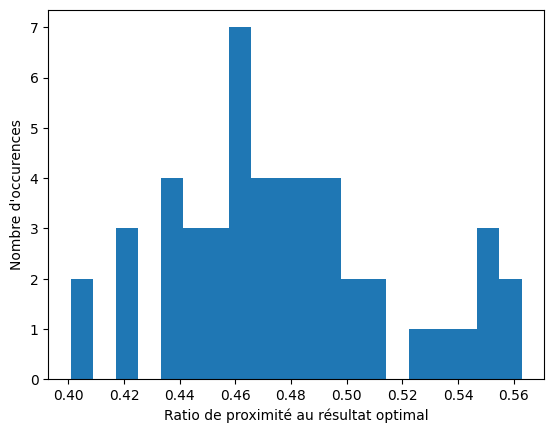

Parameter :  pheromone_deposit
╒════════════════════╤═════════════════════════════════════════════════════╕
│ Paramètre          │ Valeurs                                             │
├────────────────────┼─────────────────────────────────────────────────────┤
│ nb_ants            │ 10                                                  │
├────────────────────┼─────────────────────────────────────────────────────┤
│ nb_iterations      │ 10                                                  │
├────────────────────┼─────────────────────────────────────────────────────┤
│ pheromone_weight   │ [ 0.1  1.2  2.3  3.4  4.5  5.6  6.7  7.8  8.9 10. ] │
├────────────────────┼─────────────────────────────────────────────────────┤
│ edge_weight_weight │ 0.5                                                 │
├────────────────────┼─────────────────────────────────────────────────────┤
│ evaporation_rate   │ 0.5                                                 │
├────────────────────┼───────────────────────

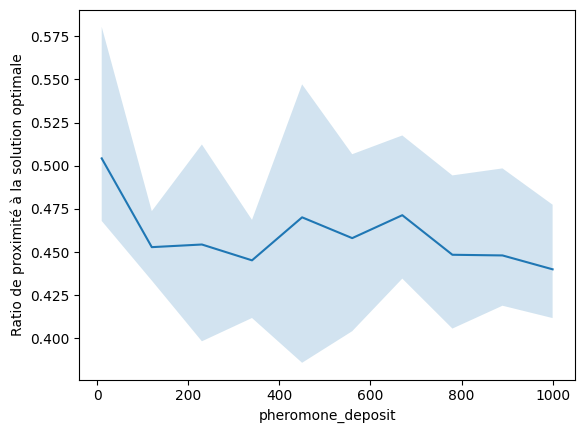

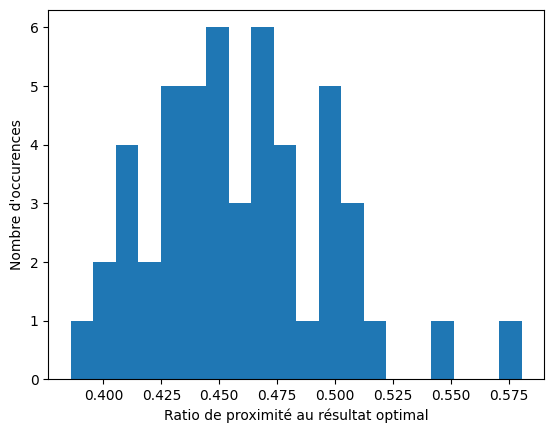

Parameter :  time_weight
╒════════════════════╤═════════════════════════════════════════════════════╕
│ Paramètre          │ Valeurs                                             │
├────────────────────┼─────────────────────────────────────────────────────┤
│ nb_ants            │ 10                                                  │
├────────────────────┼─────────────────────────────────────────────────────┤
│ nb_iterations      │ 10                                                  │
├────────────────────┼─────────────────────────────────────────────────────┤
│ pheromone_weight   │ [ 0.1  1.2  2.3  3.4  4.5  5.6  6.7  7.8  8.9 10. ] │
├────────────────────┼─────────────────────────────────────────────────────┤
│ edge_weight_weight │ 0.5                                                 │
├────────────────────┼─────────────────────────────────────────────────────┤
│ evaporation_rate   │ 0.5                                                 │
├────────────────────┼─────────────────────────────

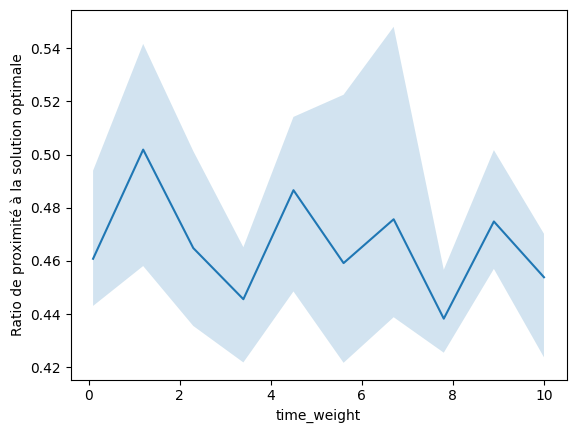

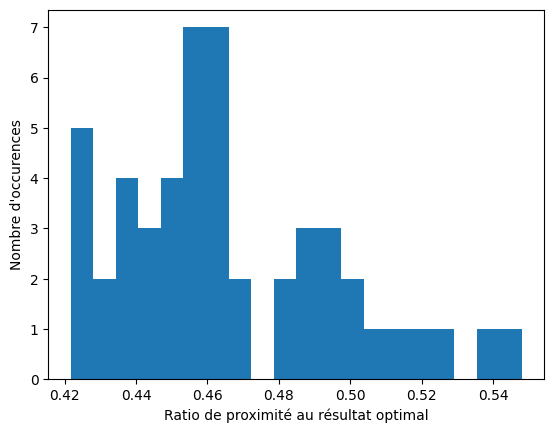

CPU times: total: 12.2 s
Wall time: 17.9 s


In [126]:
%%time

parameters = {
    'nb_ants':             (   1,   20,   10,   10 ),
    'nb_iterations':       (   1,   20,   10,   10 ),
    'pheromone_weight':    (  .1,  10.,   10,   .5 ),
    'edge_weight_weight':  (  .1,  10.,   10,   .5 ),
    'evaporation_rate':    (  .1,   .9,   10,   .5 ),
    'pheromone_deposit':   (  10, 1000,   10,  100 ),
    'time_weight':         (  .1,  10.,   10,   .5 )
}

random.seed(0)
instance, delivery_pickup, time_windows = generate_reduced_complete_instance(20, 1, 100)

for parameter_name in parameters:
    print('Parameter : ', parameter_name)

    show_parameters(parameters, parameters_to_test, instance, 0, delivery_pickup, time_windows)
    print('Itérations : ', design_of_experiences_iterations(
        parameters=parameters, 
        parameters_to_test=(parameter_name,)
    ))

    results = recursive_design_of_experiences(
        parameters=parameters, 
        parameters_to_test=(parameter_name,), 
        instance=instance, 
        start=0,
        delivery_pickup=delivery_pickup, 
        time_windows=time_windows, 
        iterations=5
    )
    
    results = compare_to_upper_bound(results, instance, 0, delivery_pickup, time_windows)

    show_stats(results,parameter_name)
    show_curve(results,parameter_name)
    show_hist(results,parameter_name)


En observant les différents graphes, on voit qu'en augmentant le nombre d'éléments (fourmis et itérations) on s'approche du résultat optimal.
En augmentant l'importance des phéromones, on a tendance à s'éloigner lentement de l'optimal. À l'inverse, l'importance du poids des arêtes nous rapproche davantage de l'optimal.
Le taux d'évaporation dépend grandement du nombre de fourmis et de la quantité déposée. Il n'influence que peu par lui-même, néanmoins, on observe une légère diminution en augmentant sa valeur. 
En augmentant le dépôt de phéromones, on renforce certains chemins et cela réduit la diversification, on est amené vers un optimum local.
L'importance des fenêtres de temps nous impacte en nous contraignant dans l'exploitation de notre graphe en nous éloignant de la meilleure solution.

### Variations des paramètres deux à deux

#### Paramètres influents

##### nb_ants et edge_weight_weight

Itérations :  100


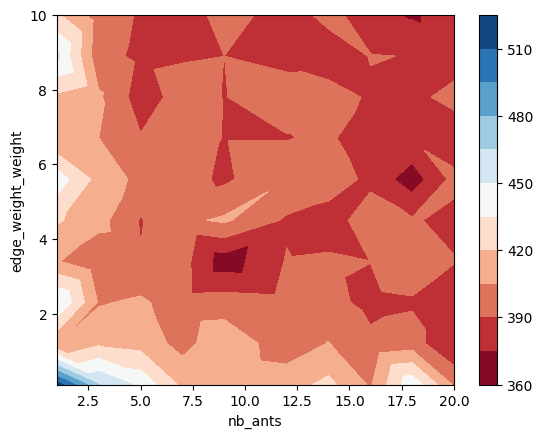

CPU times: total: 5.16 s
Wall time: 5.27 s


In [127]:
%%time

parameters = {
    'nb_ants':             (   1,   20,   10,   10 ),
    'nb_iterations':       (   1,   20,   10,   10 ),
    'pheromone_weight':    (  .1,  10.,   10,   .5 ),
    'edge_weight_weight':  (  .1,  10.,   10,   .5 ),
    'evaporation_rate':    (  .1,   .9,   10,   .5 ),
    'pheromone_deposit':   (  10, 1000,   10,  100 ),
    'time_weight':         (  .1,  10.,   10,   .5 )
}

random.seed(0)
instance, delivery_pickup, time_windows = generate_reduced_complete_instance(10, 1, 100)

parameters_to_test = ('nb_ants', 'edge_weight_weight')

print('Itérations : ', design_of_experiences_iterations(
    parameters=parameters, 
    parameters_to_test=parameters_to_test
))

results = recursive_design_of_experiences(
    parameters=parameters, 
    parameters_to_test=parameters_to_test, 
    instance=instance, 
    start=0,
    delivery_pickup=delivery_pickup, 
    time_windows=time_windows, 
    iterations=5
)
result = compare_to_upper_bound(results, instance, 0, delivery_pickup, time_windows)

show_heatmap(results,parameters_to_test[0],parameters_to_test[1])

Comme nous l'avons vu grâce aux courbes de variations des paramètres individuels, fixer le paramètre `nb_ants` aux alentours de 20 permet d'obtenir des solutions plus proches de l'optimal. Grâce à cette heatmap, on voit que le rapport entre `nb_ants` et `edges_weight_weight` n'est pas linéaire. Par exemple, si on prend les valeurs de `nb_ants` : 12, 14, 20 les valeurs optimales pour `edge_weight_weight` se placent respectivement aux alentours de 3, 6, 4. On ne pourra donc pas établir de relation entre ces deux paramètres. On peut cependant établir que pour la valeur optimale de `nb_ants` (20) il est préférable de définir `edge_weight_weight` aux alentours de 4. 

Sinon, en général, on peut voir qu'il est préférable de grader `nb_ants` au-dessus de 12 et `edge_weight_weight` au-dessus de 4.

#### Tout 

╒════════════════════╤═════════════════════════════════╕
│ Paramètre          │ Valeurs                         │
├────────────────────┼─────────────────────────────────┤
│ nb_ants            │ [ 1  3  5  7  9 12 14 16 18 20] │
├────────────────────┼─────────────────────────────────┤
│ nb_iterations      │ [ 1  3  5  7  9 12 14 16 18 20] │
├────────────────────┼─────────────────────────────────┤
│ pheromone_weight   │ 0.5                             │
├────────────────────┼─────────────────────────────────┤
│ edge_weight_weight │ 0.5                             │
├────────────────────┼─────────────────────────────────┤
│ evaporation_rate   │ 0.5                             │
├────────────────────┼─────────────────────────────────┤
│ pheromone_deposit  │ 100                             │
├────────────────────┼─────────────────────────────────┤
│ time_weight        │ 0.5                             │
╘════════════════════╧═════════════════════════════════╛
Taille de l'instance : 10 , Ité

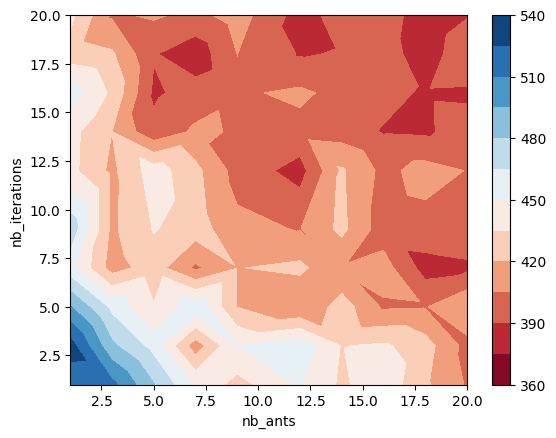

TypeError: list indices must be integers or slices, not str

In [128]:
%%time

parameters = {
    'nb_ants':             (   1,   20,   10,   10 ),
    'nb_iterations':       (   1,   20,   10,   10 ),
    'pheromone_weight':    (  .1,  10.,   10,   .5 ),
    'edge_weight_weight':  (  .1,  10.,   10,   .5 ),
    'evaporation_rate':    (  .1,   .9,   10,   .5 ),
    'pheromone_deposit':   (  10, 1000,   10,  100 ),
    'time_weight':         (  .1,  10.,   10,   .5 )
}

random.seed(0)
instance_size = 10
instance, delivery_pickup, time_windows = generate_reduced_complete_instance(instance_size, 1, 100)

parameters_name = list(parameters.keys())
for p1 in range(len(parameters_name)):
    for p2 in range(p1+1, len(parameters_name)):
        p1 = parameters_name[p1]
        p2 = parameters_name[p2]        
            
        parameters_to_test = (p1,p2)
        
        show_parameters(parameters, parameters_to_test, instance, 0, delivery_pickup, time_windows)
        print('Taille de l\'instance :', instance_size, ', Itérations : ', design_of_experiences_iterations(
            parameters=parameters, 
            parameters_to_test=parameters_to_test
        ))
        
        results = recursive_design_of_experiences(
            parameters=parameters, 
            parameters_to_test=parameters_to_test, 
            instance=instance, 
            start=0,
            delivery_pickup=delivery_pickup, 
            time_windows=time_windows, 
            iterations=5
        )
        result = compare_to_upper_bound(results, instance, 0, delivery_pickup, time_windows)
        
        show_heatmap(results,p1,p2)

Dans un premier temps, on peut établir que les heatmap dont la couleur change drastiquement horizontalement ou verticalement, par exemple celles entre : (`time_weight`, `pheromone_deposit`) ; (`time_weight`, `evaporation_rate`) ; (`pheromone_deposit`, `pheromone_weight`) impliquent qu'un paramètre influe beaucoup plus sur la solution que l'autre.

On peut donc déjà établir que des paramètres tels que : `time_weight` ou `pheromone_weight` font grandement varier la solution et devrait donc être paramétré à une valeur fixe.

Nous nous intéresserons au graphe dont la variation et plus diagonale, c'est-à-dire que les deux paramètres sont autant impliqués.

## Conclusion

# Annexes


## Exemple d'exécution

CPU times: total: 0 ns
Wall time: 30.7 ms


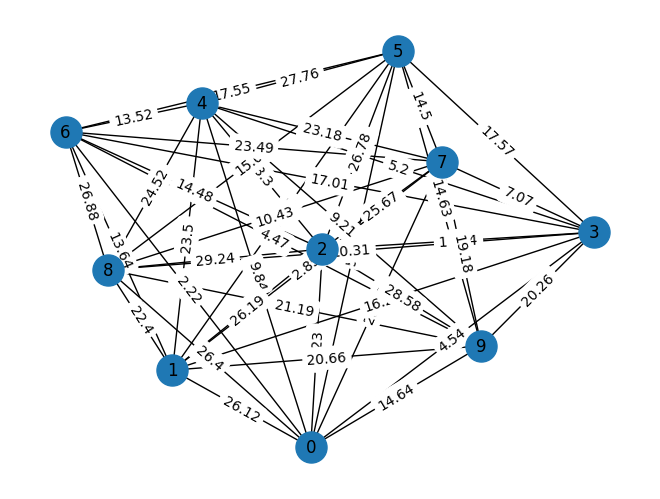

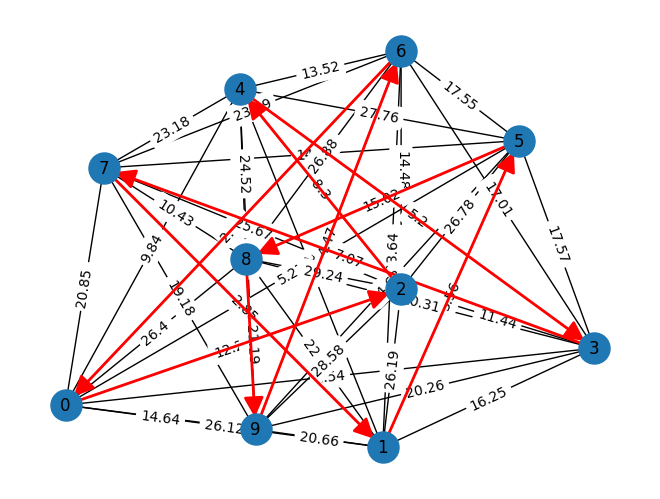

In [129]:
instance = generate_reduced_default_instance(10, 1, 30)

start = random.choice(list(instance.keys()))

%time solution = ants_exploration_default(instance, start, 20, 20)

show_instance(instance)

show_solution(instance, solution[0])

CPU times: total: 0 ns
Wall time: 29.1 ms


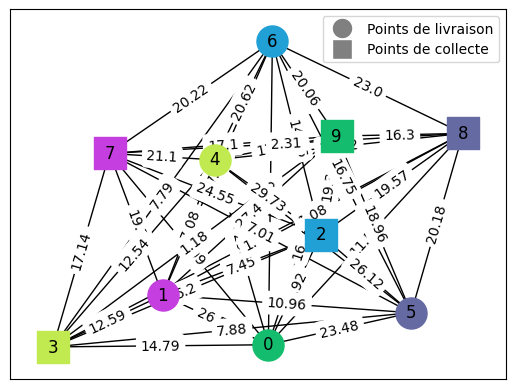

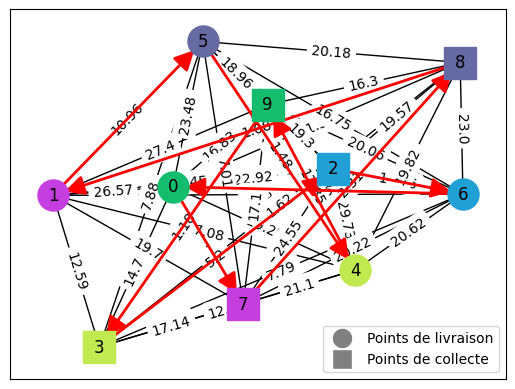

In [130]:
instance, delivery_pickup = generate_reduced_pickup_instance(10, 1, 30)

start = random.choice(list(delivery_pickup.keys()))

%time solution = ants_exploration_pickup(instance, delivery_pickup, start, 20, 20)

show_instance(instance, delivery_pickup=delivery_pickup)

show_solution(instance, solution[0], delivery_pickup=delivery_pickup)

CPU times: total: 0 ns
Wall time: 37.6 ms


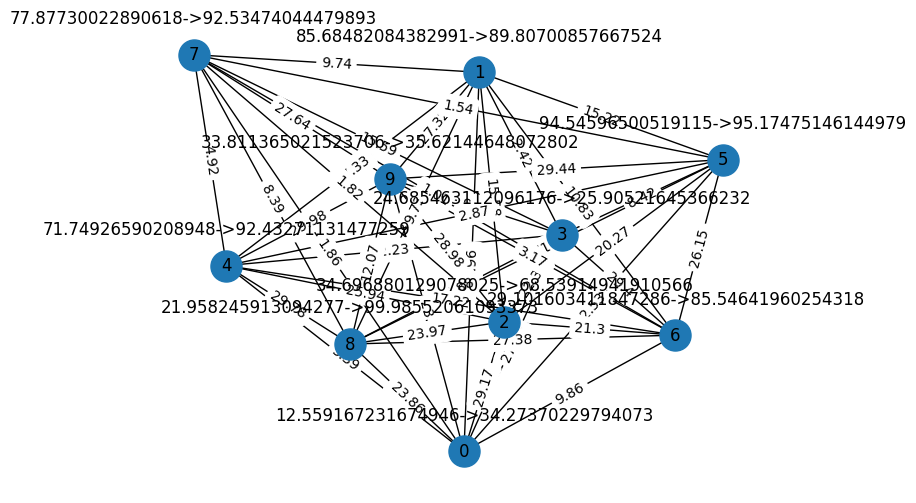

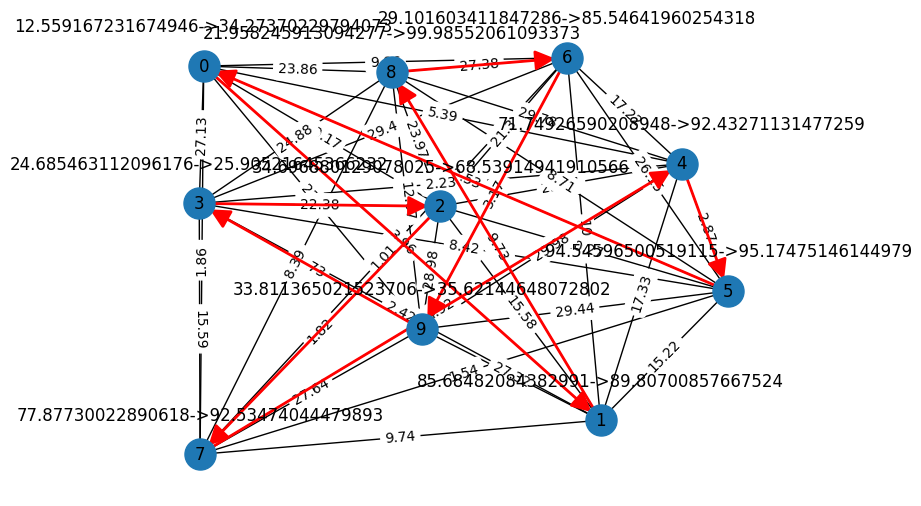

In [131]:
instance, time_windows = generate_reduced_time_instance(10, 1, 30, 100)

start = random.choice(list(instance.keys()))

%time solution = ants_exploration_time(instance, time_windows, start, 20, 20)

show_instance(instance, time_windows=time_windows)

show_solution(instance, solution[0], time_windows=time_windows)

CPU times: total: 31.2 ms
Wall time: 37.9 ms


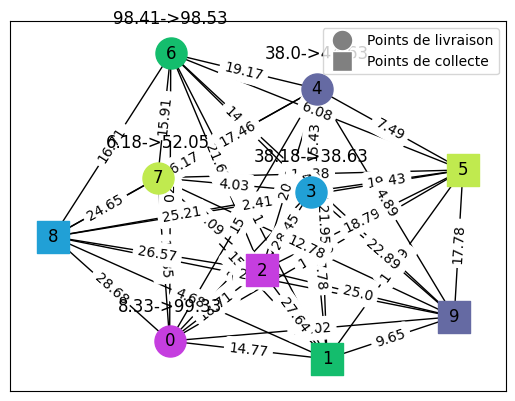

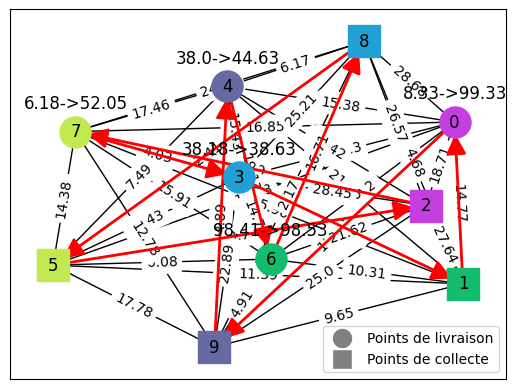

In [133]:
instance, delivery_pickup, time_windows = generate_reduced_complete_instance(10, 1, 30, 100)

start = random.choice(list(delivery_pickup.values()))

%time solution = ants_exploration_complete(instance, delivery_pickup=delivery_pickup, time_windows=time_windows, start=start, nb_ants=20, nb_iterations=20)

show_instance(instance, time_windows=time_windows, delivery_pickup=delivery_pickup)

show_solution(instance, solution[0], time_windows=time_windows, delivery_pickup=delivery_pickup)